In [121]:
# import required libraries
import os
import sys
from os import listdir
from os.path import isfile, join
import IPython.display as ipd
import librosa 
import librosa.display
%matplotlib inline

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from scipy.io import wavfile as wav
import numpy as np
from timeit import default_timer as timer

#cnn
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,f1_score,recall_score,precision_recall_fscore_support
from sklearn.model_selection import train_test_split
from keras.models import Sequential, Model,load_model
from keras.layers import Input, Dense, Dropout, LSTM, Embedding, Flatten, Bidirectional, BatchNormalization
from keras.preprocessing import image
from tensorflow.keras.utils import plot_model
import tensorflow as tf
import tensorflow.keras as keras
from sklearn.metrics import confusion_matrix

In [ ]:
# Mount google drive to export dataset
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [5]:
# load dataset
dataset_path = "Data/"
csv = dataset_path+'features_30_sec.csv'
data = pd.read_csv(csv)
data

filename  length  chroma_stft_mean  chroma_stft_var  rms_mean  \
0    blues.00000.wav  661794          0.350088         0.088757  0.130228   
1    blues.00001.wav  661794          0.340914         0.094980  0.095948   
2    blues.00002.wav  661794          0.363637         0.085275  0.175570   
3    blues.00003.wav  661794          0.404785         0.093999  0.141093   
4    blues.00004.wav  661794          0.308526         0.087841  0.091529   
..               ...     ...               ...              ...       ...   
995   rock.00095.wav  661794          0.352063         0.080487  0.079486   
996   rock.00096.wav  661794          0.398687         0.075086  0.076458   
997   rock.00097.wav  661794          0.432142         0.075268  0.081651   
998   rock.00098.wav  661794          0.362485         0.091506  0.083860   
999   rock.00099.wav  661794          0.358401         0.085884  0.054454   

      rms_var  spectral_centroid_mean  spectral_centroid_var  \
0    0.002827             1784.165850          129774.064525   
1    0.002373             1530.176679          375850.073649   
2    0.002746             1552.811865          156467.643368   
3    0.006346             1070.106615          184355.942417   
4    0.002303             1835.004266          343399.939274   
..        ...                     ...                    ...   
995  0.000345             2008.149458          282174.689224   
996  0.000588             2006.843354          182114.709510   
997  0.000322             2077.526598          231657.968040   
998  0.001211             1398.699344          240318.731073   
999  0.000336             1609.795082          422203.216152   

     spectral_bandwidth_mean  spectral_bandwidth_var  ...  mfcc16_var  \
0                2002.449060            85882.761315  ...   52.420910   
1                2039.036516           213843.755497  ...   55.356403   
2                1747.702312            76254.192257  ...   40.598766   
3                1596.412872           166441.494769  ...   44.427753   
4                1748.172116            88445.209036  ...   86.099236   
..                       ...                     ...  ...         ...   
995              2106.541053            88609.749506  ...   45.050526   
996              2068.942009            82426.016726  ...   33.851742   
997              1927.293153            74717.124394  ...   33.597008   
998              1818.450280           109090.207161  ...   46.324894   
999              1797.213044           120115.632927  ...   59.167755   

     mfcc17_mean  mfcc17_var  mfcc18_mean  mfcc18_var  mfcc19_mean  \
0      -1.690215   36.524071    -0.408979   41.597103    -2.303523   
1      -0.731125   60.314529     0.295073   48.120598    -0.283518   
2      -7.729093   47.639427    -1.816407   52.382141    -3.439720   
3      -3.319597   50.206673     0.636965   37.319130    -0.619121   
4      -5.454034   75.269707    -0.916874   53.613918    -4.404827   
..           ...         ...          ...         ...          ...   
995   -13.289984   41.754955     2.484145   36.778877    -6.713265   
996   -10.848309   39.395096     1.881229   32.010040    -7.461491   
997   -12.845291   36.367264     3.440978   36.001110   -12.588070   
998    -4.416050   43.583942     1.556207   34.331261    -5.041897   
999    -7.069775   73.760391     0.028346   76.504326    -2.025783   

     mfcc19_var  mfcc20_mean  mfcc20_var  label  
0     55.062923     1.221291   46.936035  blues  
1     51.106190     0.531217   45.786282  blues  
2     46.639660    -2.231258   30.573025  blues  
3     37.259739    -3.407448   31.949339  blues  
4     62.910812   -11.703234   55.195160  blues  
..          ...          ...         ...    ...  
995   54.866825    -1.193787   49.950665   rock  
996   39.196327    -2.795338   31.773624   rock  
997   42.502201    -2.106337   29.865515   rock  
998   47.227180    -3.590644   41.299088   rock  
999   72.189316     1.155239   49.662510   rock  


# Data Visualization and Pre-processing

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


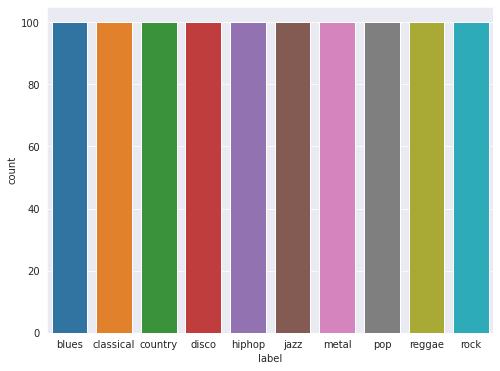

In [ ]:
#Checking the Distribution of the Target Variable in the Dataset 
plt.figure(figsize=(8,6))
sns.set_style("darkgrid")
ax = sns.countplot(data["label"])
#ax.set_title("Distribution of Genres in the Dataset", fontsize = 14)


In [9]:
# load one audio file instance
filename=dataset_path+'genres_original/blues/blues.00005.wav'
ipd.Audio(filename)

In [6]:
genres=os.listdir(os.path.join(dataset_path,'genres_original/'))

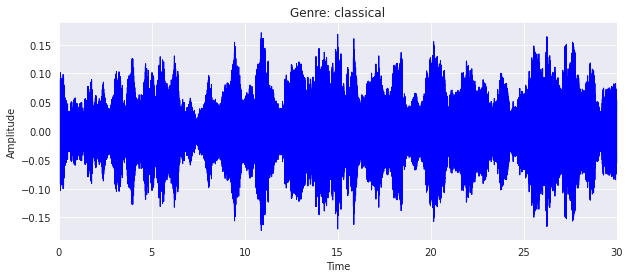

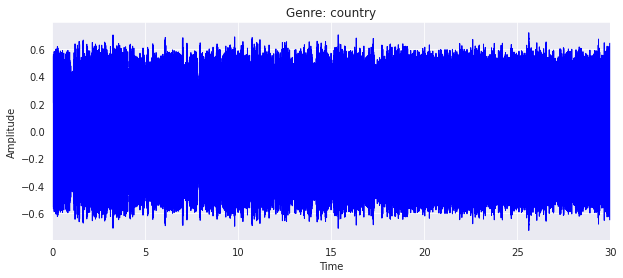

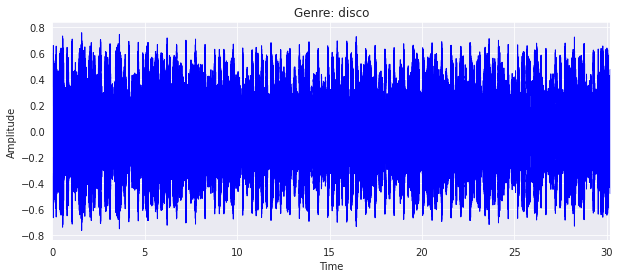

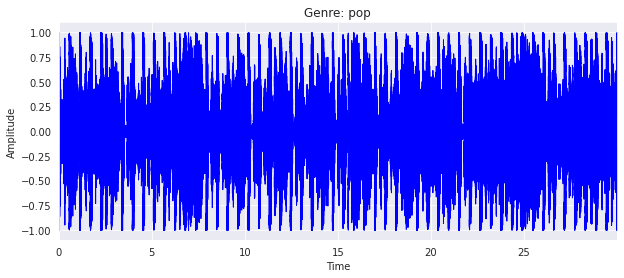

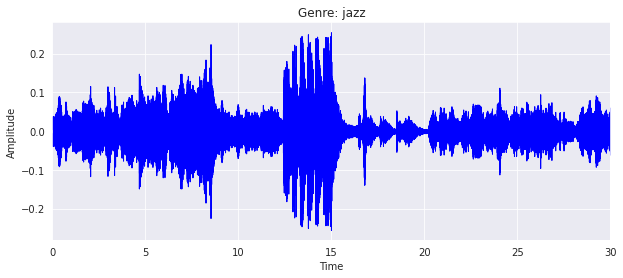

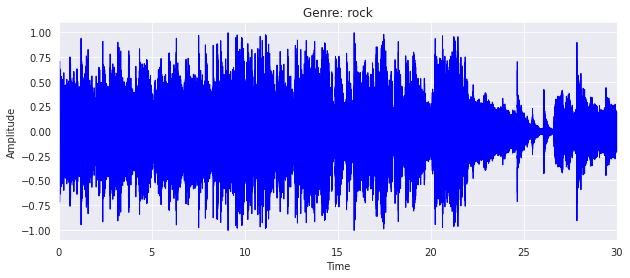

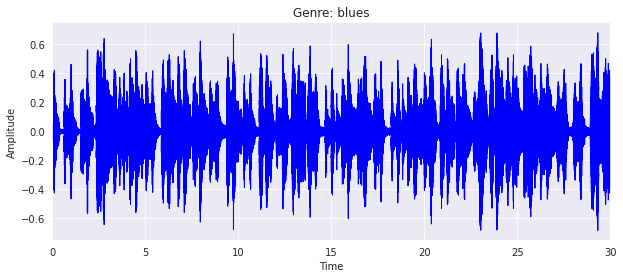

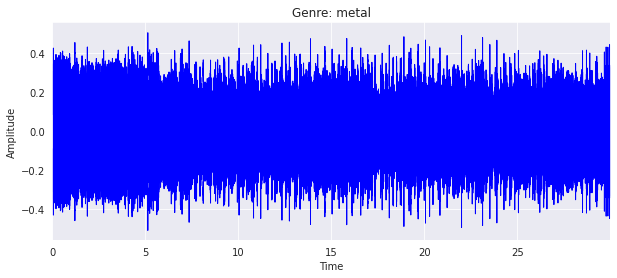

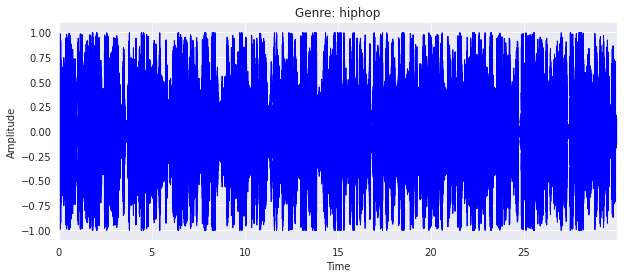

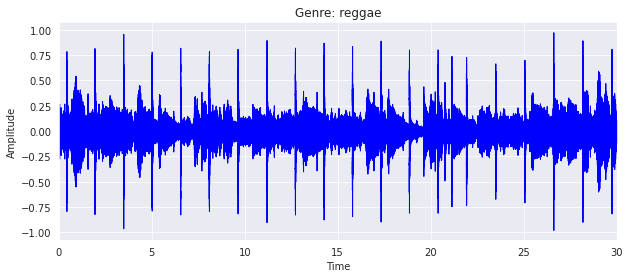

In [ ]:
#Plotting raw WAV files as per genres
for x in genres:
    y,sr=librosa.load(os.path.join(dataset_path,'genres_original', x,'{}.00001.wav'.format(x)))
    plt.figure(figsize=(10,4))
    librosa.display.waveplot(y=y,sr=sr,color='b')
    plt.ylabel("Amplitude")
    plt.title("Genre: {}".format(x))

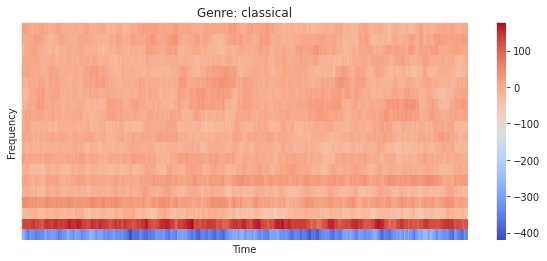

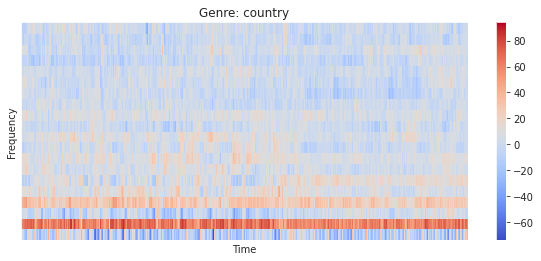

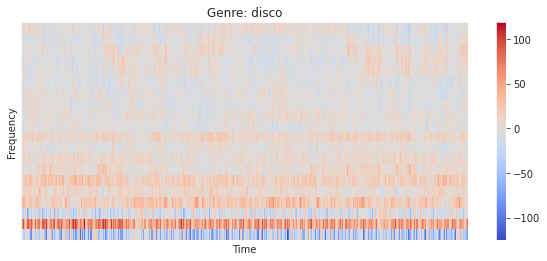

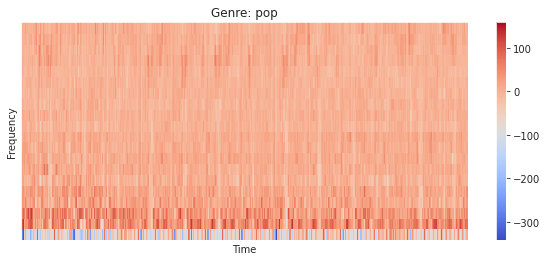

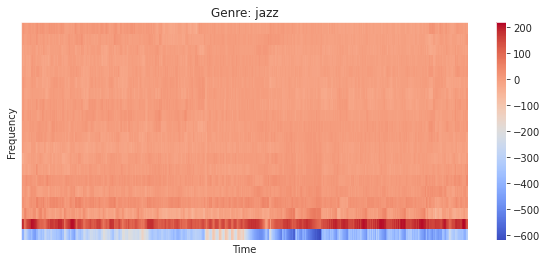

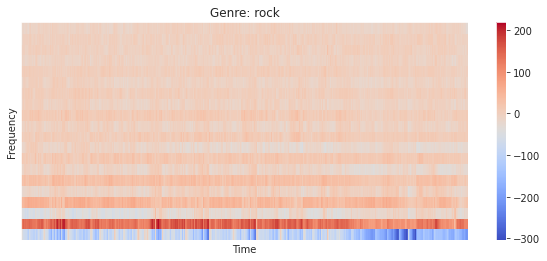

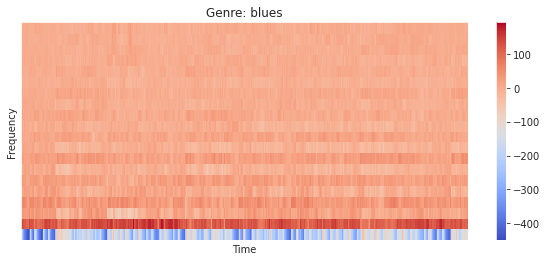

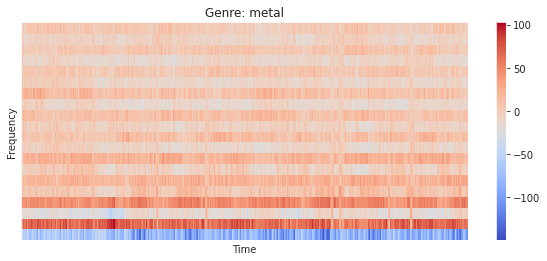

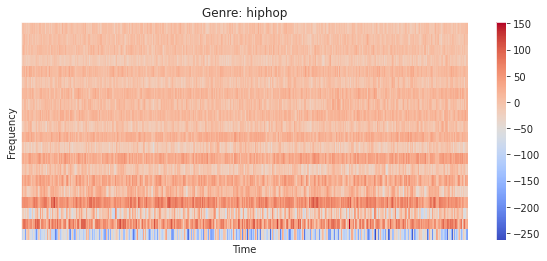

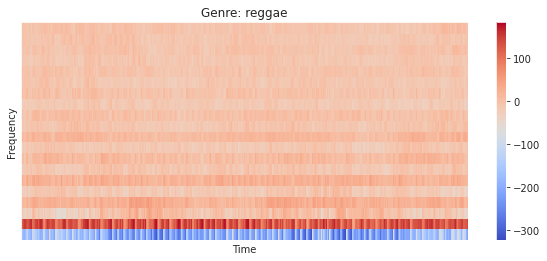

In [ ]:
#Plotting MFCC features 
genres=os.listdir(os.path.join(dataset_path,'genres_original/'))

for x in genres:
    y,sr=librosa.load(os.path.join(dataset_path,'genres_original', x,'{}.00001.wav'.format(x)))
    mfcc = librosa.feature.mfcc(y, sr, n_mfcc=20)
    plt.figure(figsize=(10,4))
    librosa.display.specshow(mfcc)
    plt.colorbar()
    plt.title("Genre: {}".format(x))
    plt.xlabel("Time")
    plt.ylabel("Frequency")

In [7]:
# extract MFCC for a file for 20 components
def extract_mfcc(file):
  y, sr = librosa.load(file, res_type = "kaiser_fast")
  mfcc = np.mean(librosa.feature.mfcc(y= y, sr=sr, n_mfcc = 20,fmax=8000).T, axis = 0)
  return mfcc

In [10]:
# calculate time to extract MFCC for one file
start_time=timer()
a=extract_mfcc(filename)
end_time=timer()
print('Time to extract MFCC from one file: {:.3f}sec'.format((end_time-start_time)/60))
print(a.shape)

Time to extract MFCC from one file: 0.002sec
(20,)


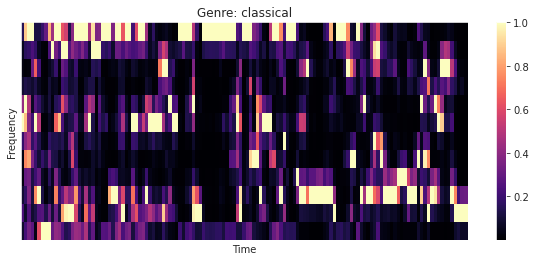

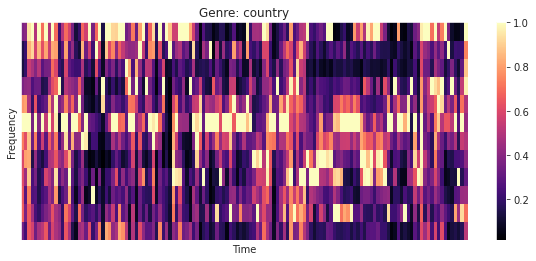

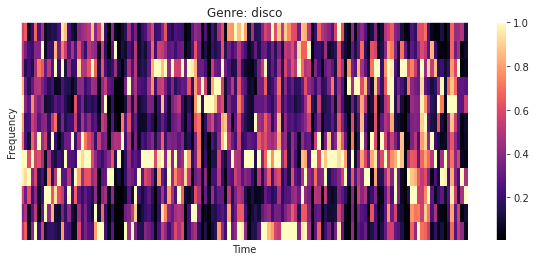

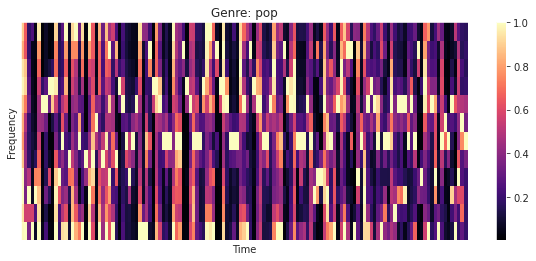

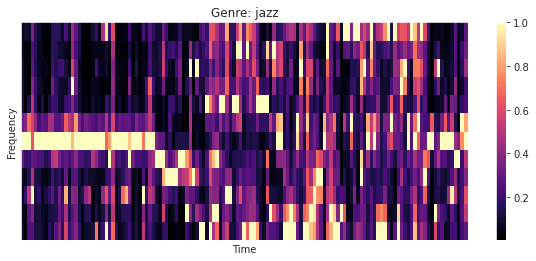

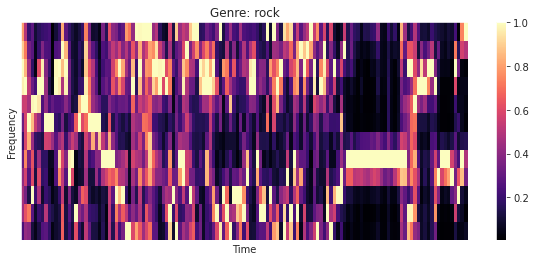

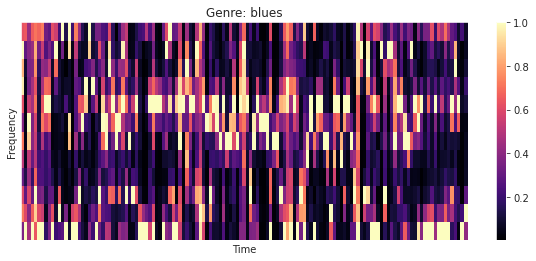

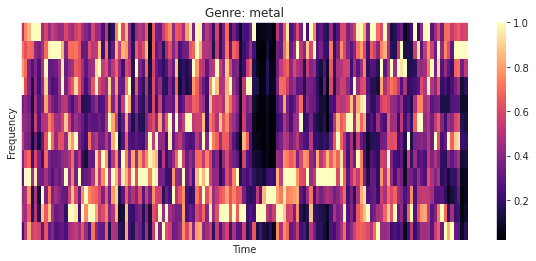

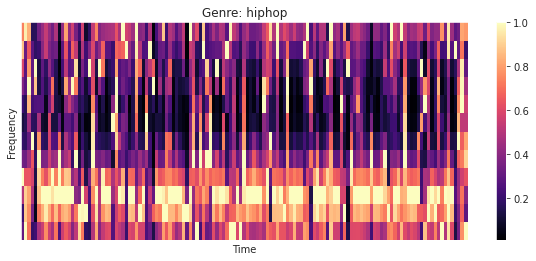

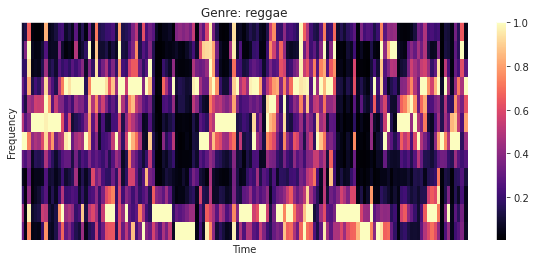

In [ ]:
#plotting Chroma_STFT for each genre
genres=os.listdir(os.path.join(dataset_path,'genres_original/'))

for x in genres:
    y,sr=librosa.load(os.path.join(dataset_path,'genres_original', x,'{}.00001.wav'.format(x)))
    chromagram = librosa.feature.chroma_stft(y, sr=sr, hop_length=5000)
    plt.figure(figsize=(10,4))
    librosa.display.specshow(chromagram)
    plt.colorbar()
    plt.title("Genre: {}".format(x))
    plt.xlabel("Time")
    plt.ylabel("Frequency")

In [11]:
# extract chroma stft features

# We can increase or decrease hop_length to change the granularity of data
hop_length = 5000

# entire spectrum will be represented in 12 distinct semitones (or chroma) of the musical octave
def extract_chroma_stft(file, sr):
  chromagram = np.mean(librosa.feature.chroma_stft(file, sr=sr, hop_length=hop_length).T, axis = 0)
  return chromagram

In [7]:
# calculate time to extract chroma stft for one file
filename='Data/genres_original/blues/blues.00005.wav'
y, sr = librosa.load(filename)
audio_file, _ = librosa.effects.trim(y)  # return a numpy array by removing starting and ending silence from the audio signal

start_time=timer()
a=extract_chroma_stft(audio_file, sr)
end_time=timer()
print('Time to extract chroma features from one file: {:.3f}sec'.format((end_time-start_time)/60))
print(a.shape)

Time to extract chroma features from one file: 0.000sec
(12,)


/var/folders/tb/_r9khl_d2kg0jn_8gxpg4zj00000gn/T/ipykernel_78698/2563001195.py:8: FutureWarning: Pass y=[-0.02429199 -0.02975464 -0.00961304 ...  0.13458252  0.0619812
 -0.00091553] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  chromagram = np.mean(librosa.feature.chroma_stft(file, sr=sr, hop_length=hop_length).T, axis = 0)


# Data Augmentation

In [8]:
#data augmentation - add white gaussian noise with 0 mean and 1 standard deviation
def add_noise(x,w):
    output =  x + w * np.random.normal(0, 1, size=len(x))
    return output

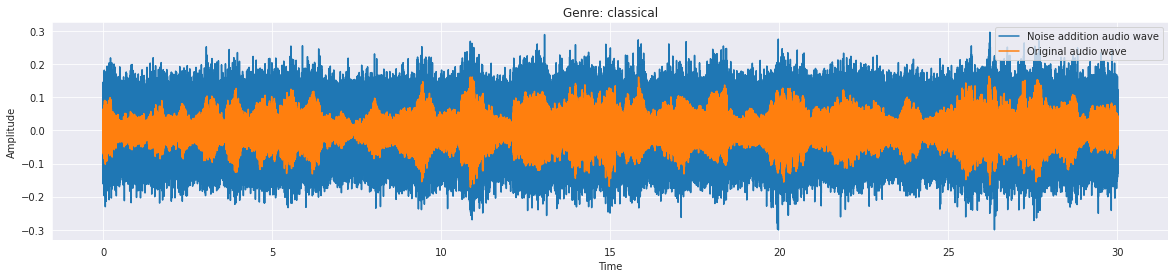

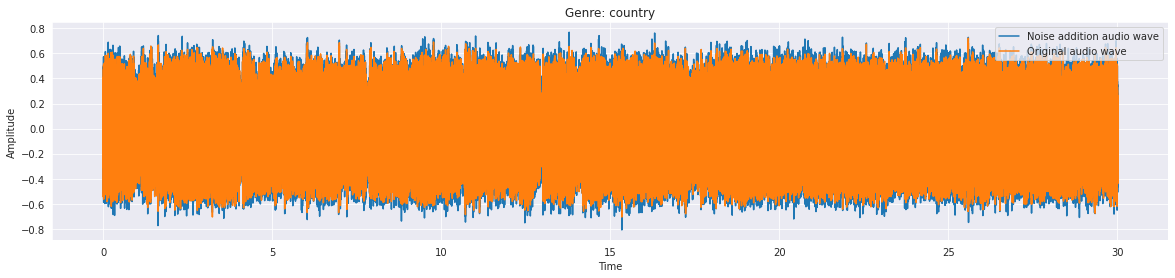

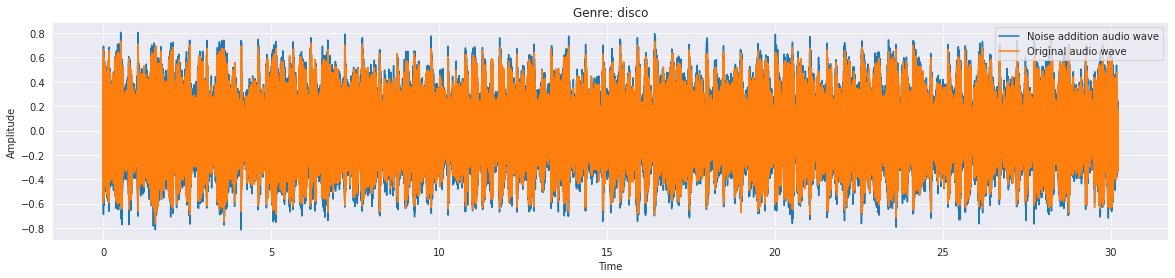

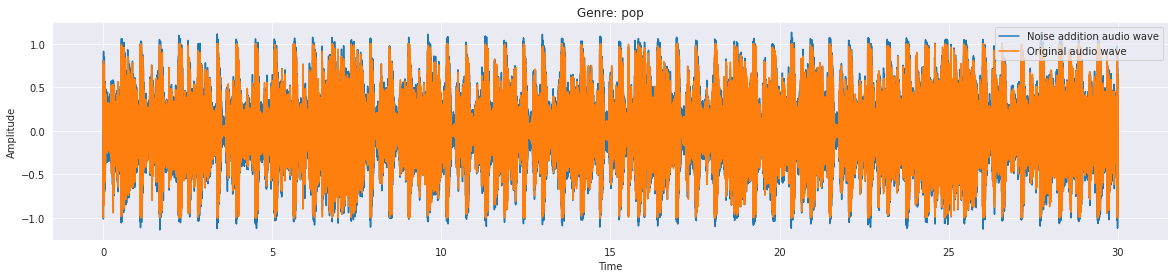

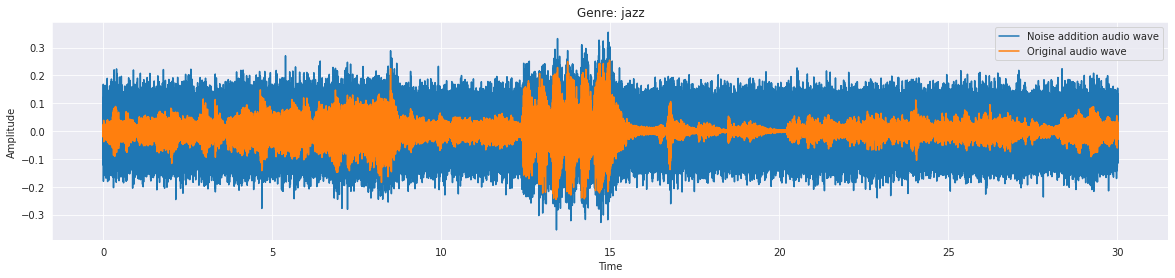

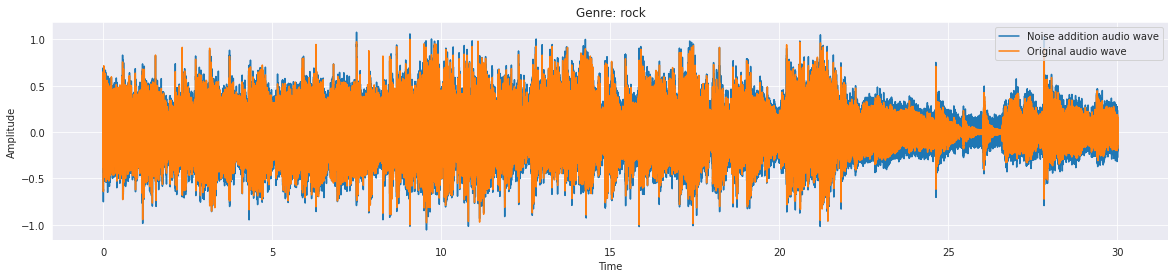

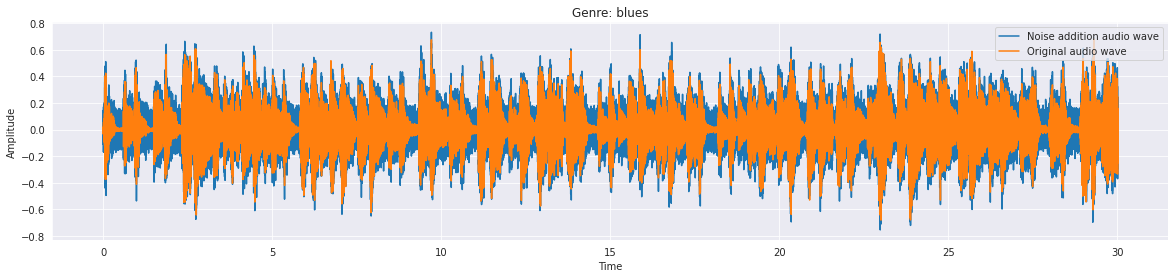

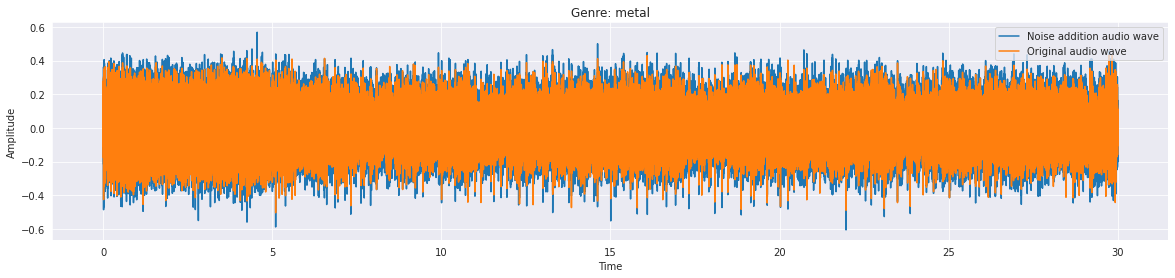

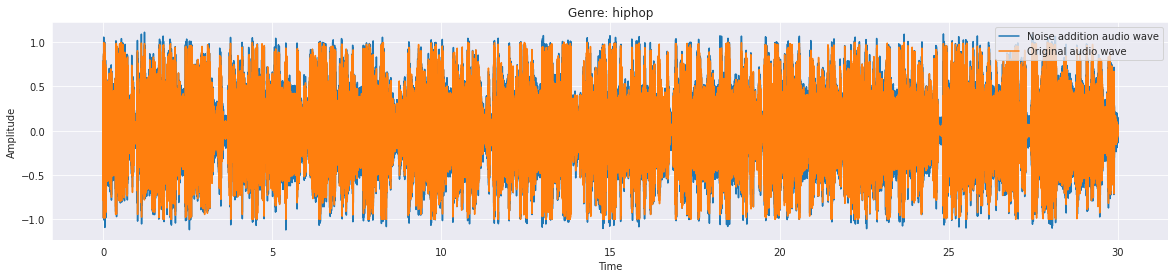

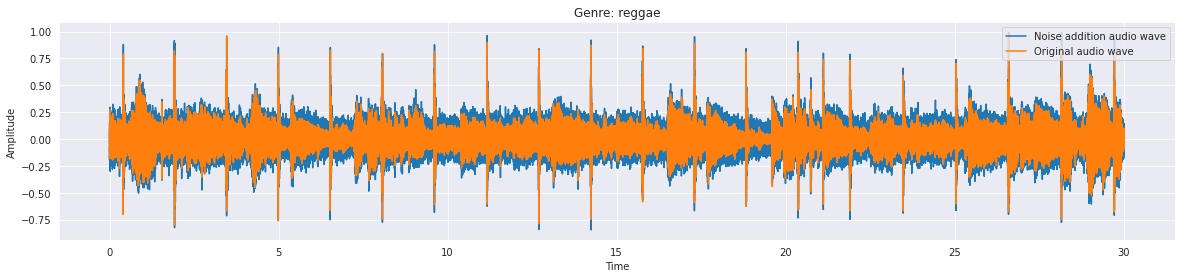

In [ ]:
#Plotting raw WAV files as per genres with gaussian noise augmentation
for x in genres:
    y,sr=librosa.load(os.path.join(dataset_path,'genres_original', x,'{}.00001.wav'.format(x)))
    y_noise = add_noise(y,0.05)
    plt.figure(figsize=(20,4))
    time_aug = np.arange(0,len(y_noise)) * (1.0/sr)
    plt.plot(time_aug,y_noise)
    time = np.arange(0,len(y)) * (1.0/sr)
    plt.plot(time,y)
    plt.ylabel("Amplitude")
    plt.xlabel('Time')
    plt.legend(['Noise addition audio wave','Original audio wave'],loc='upper right')
    plt.title("Genre: {}".format(x))

In [9]:
# data augmentation - time shift
def time_shift(x,shift):
    return np.roll(x,int(shift))

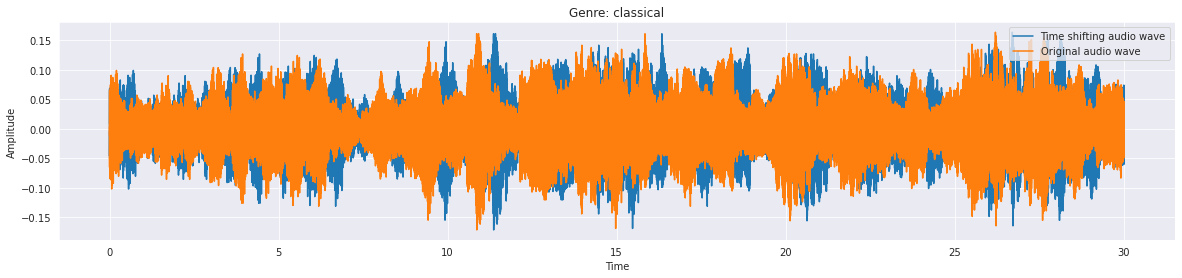

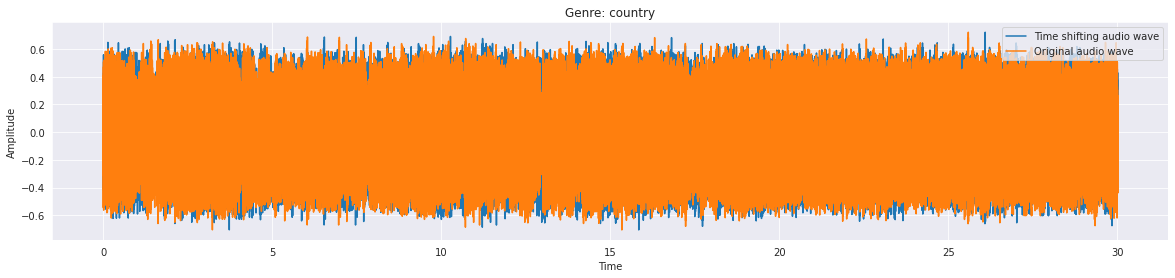

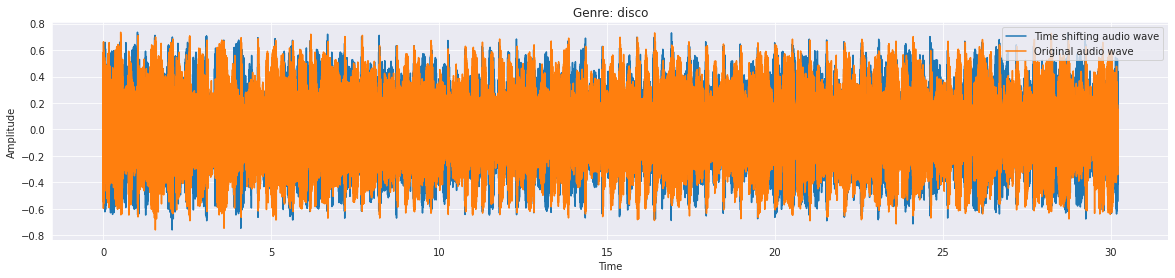

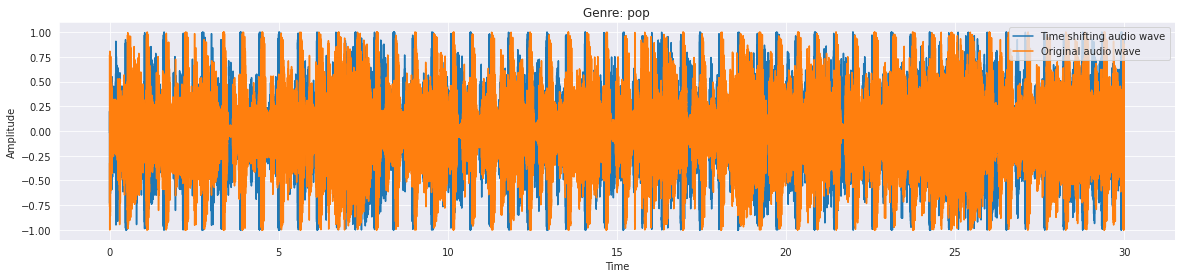

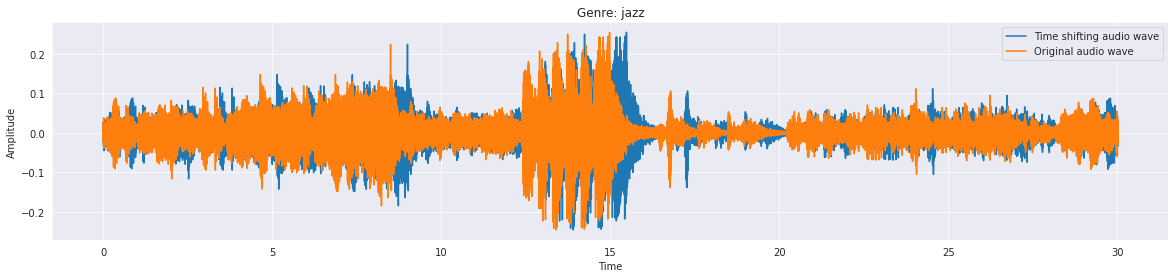

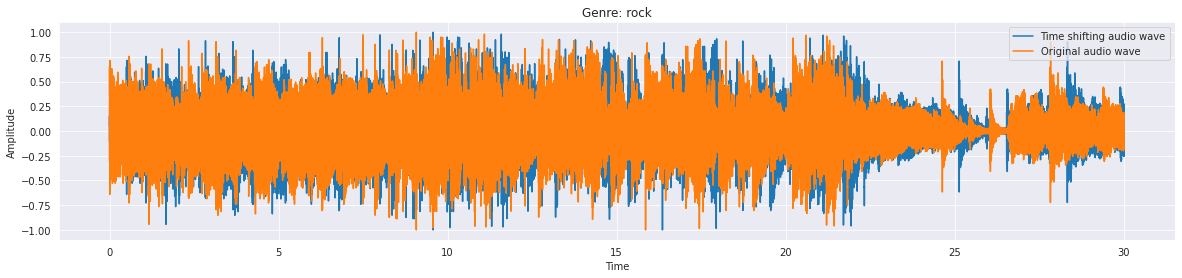

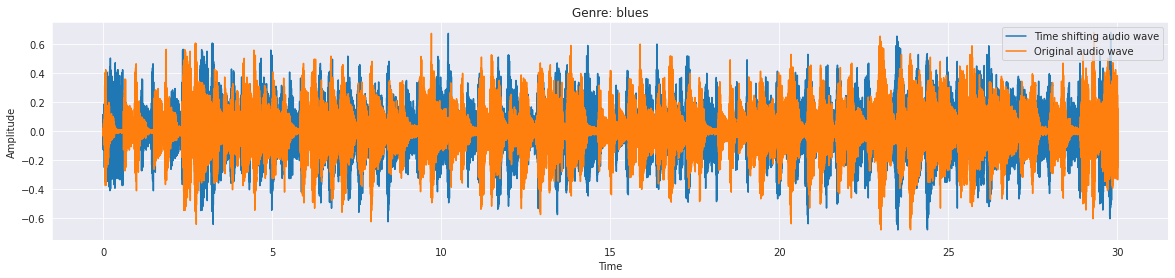

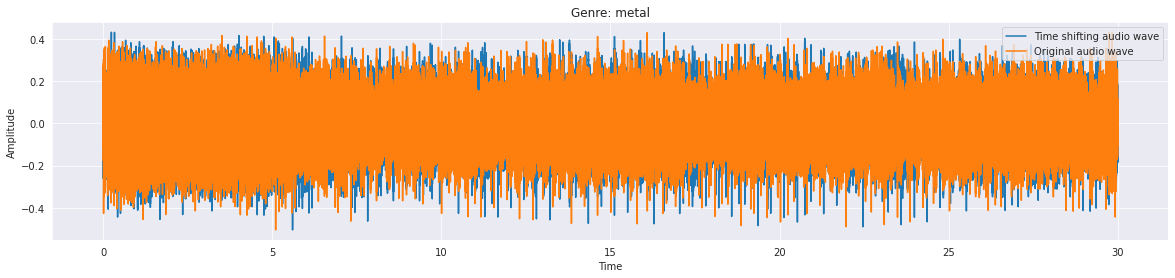

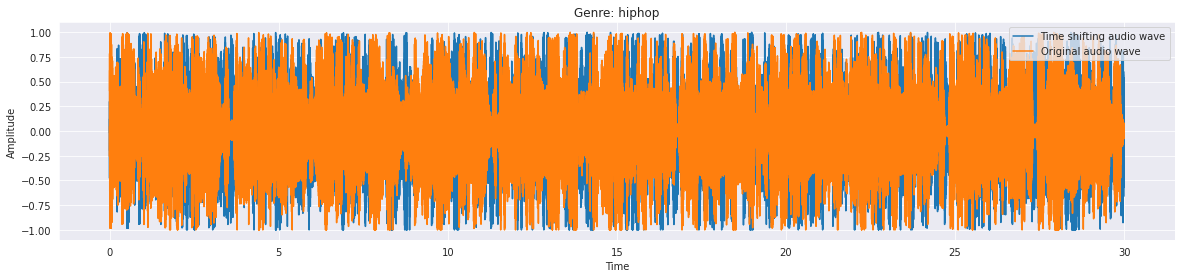

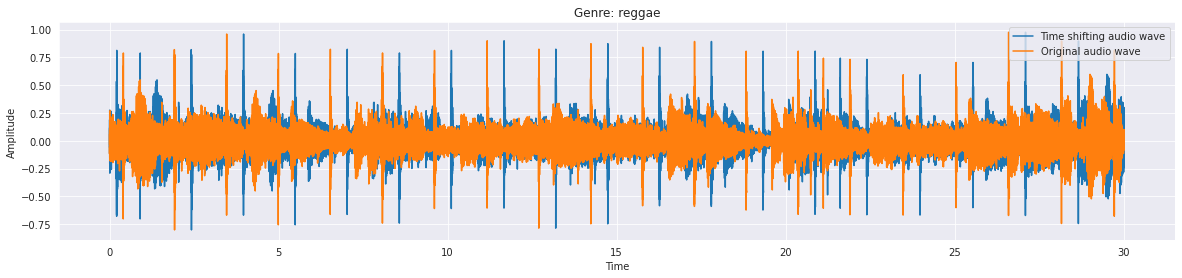

In [ ]:
#Plotting raw WAV files as per genres with time shifing augmentation
for x in genres:
    y,sr=librosa.load(os.path.join(dataset_path,'genres_original', x,'{}.00001.wav'.format(x)))
    y_noise = time_shift(y,sr/2)
    plt.figure(figsize=(20,4))
    time_aug = np.arange(0,len(y_noise)) * (1.0/sr)
    plt.plot(time_aug,y_noise)
    time = np.arange(0,len(y)) * (1.0/sr)
    plt.plot(time,y)
    plt.ylabel("Amplitude")
    plt.xlabel('Time')
    plt.legend(['Time shifting audio wave','Original audio wave'],loc='upper right')
    plt.title("Genre: {}".format(x))

In [10]:
#float to pcm
#referenced from https://gist.github.com/HudsonHuang/fbdf8e9af7993fe2a91620d3fb86a182
def float2pcm(sig, dtype='int16'):
    sig = np.asarray(sig)
    dtype = np.dtype(dtype)
    i = np.iinfo(dtype)
    abs_max = 2 ** (i.bits - 1)
    offset = i.min + abs_max
    return (sig * abs_max + offset).clip(i.min, i.max).astype(dtype)

In [11]:
#write wave files
#referenced from https://www.tutorialspoint.com/read-and-write-wav-files-using-python-wave
import wave, struct
sampleRate = 44100.0 # hertz

def write_wav_file(data,filename):
    data1 = float2pcm(data)
    obj = wave.open(filename,'w')
    obj.setnchannels(1) # mono
    obj.setsampwidth(2)
    obj.setframerate(sampleRate)
    for i in range(data1.shape[0]):
        value = data1[i]
        data_write = struct.pack('h', value)
        obj.writeframesraw(data_write)
    obj.close()

In [ ]:
#put augmented data into the file
#except jazz.00054.wav file
index = 0
for x in genres:
    for index in range(100):
        if(x == 'jazz' and index == 54):
            index = index + 1
        else:
            if(index < 10):
                filename_ori = '/content/gdrive/MyDrive/Data/genres_original/' + x + '/' + x + '.0000' + str(index) +'.wav'
                filename_aug_noise = '/content/gdrive/MyDrive/Data/genres_original/' + x + '/' + 'aug_noise_' + x + '.0000' + str(index) +'.wav'
                filename_aug_timeShift = '/content/gdrive/MyDrive/Data/genres_original/' + x + '/' + 'aug_timeShift_' + x + '.0000' + str(index) +'.wav'
            if(index >= 10):
                filename_ori = '/content/gdrive/MyDrive/Data/genres_original/' + x + '/' + x + '.000' + str(index) +'.wav'
                filename_aug_noise = '/content/gdrive/MyDrive/Data/genres_original/' + x + '/' + 'aug_noise_' + x + '.000' + str(index) +'.wav'
                filename_aug_timeShift = '/content/gdrive/MyDrive/Data/genres_original/' + x + '/' + 'aug_timeShift_' + x + '.000' + str(index) +'.wav'
            y,sr = librosa.load(filename_ori)
            y_noise = add_noise(x=y,w=0.05)
            y_timeShift = time_shift(y,sr/2)
            write_wav_file(y_noise,filename_aug_noise)
            write_wav_file(y_timeShift,filename_aug_timeShift)
            index = index + 1   

# Feature extraction

In [13]:
# Extracting mfcc features from original dataset
from tqdm import tqdm 

features = []

start_time = timer()
for index, row in tqdm(data.iterrows()):
  try:
    label= row["label"]
    file = os.path.join(os.path.abspath("Data/genres_original/"), label + "/", str(row["filename"]))
    mfcc = extract_mfcc(file)
    #feat = np.reshape(mfcc)
    features.append([mfcc, mfcc.shape, label])
  except Exception as e:
    print(f"Error:{e}")
    continue
end_time = timer()
print("")
print("Total time taken to extract features: {0} minutes {1:.1f} seconds".format((end_time - start_time)//60, (end_time - start_time)%60))

552it [00:15, 38.56it/s]/Users/shiyun/miniconda3/envs/tf/lib/python3.9/site-packages/librosa/util/decorators.py:88: UserWarning: PySoundFile failed. Trying audioread instead.
  return f(*args, **kwargs)
560it [00:15, 23.09it/s]

Error:


1000it [00:27, 36.46it/s]


Total time taken to extract features: 0.0 minutes 27.5 seconds


In [14]:
# extracting mfcc features from augmented dataset
aug_features = []

start_time = timer()
for index, row in tqdm(data.iterrows()):
  try:
    if str(row["filename"]) == 'jazz.00054.wav':           #skipping one corrupted file
      continue
      
    label= row["label"]
    file = os.path.join(os.path.abspath("Data/genres_original/"), label + "/", str(row["filename"]))
    aug_noise_file = os.path.join(os.path.abspath("Data/genres_original/"), label + "/", 'aug_noise_'+str(row["filename"]))
    aug_timeShift_file = os.path.join(os.path.abspath("Data/genres_original/"), label + "/", 'aug_timeShift_'+str(row["filename"]))
    mfcc = extract_mfcc(file)
    aug_noise_mfcc = extract_mfcc(aug_noise_file)
    aug_timeShift_mfcc = extract_mfcc(aug_timeShift_file)
    aug_features.append([mfcc, aug_noise_mfcc.shape, label])
    aug_features.append([aug_noise_mfcc, aug_noise_mfcc.shape, label])
    aug_features.append([aug_timeShift_mfcc, aug_timeShift_mfcc.shape, label])

  except Exception as e:
    print(f"Error:{e}")
    continue
end_time = timer()
print("")
print("Total time taken to extract augmented mfcc features: {0} minutes {1:.1f} seconds".format((end_time - start_time)//60, (end_time - start_time)%60))
print("Augmented mfcc features shape: "+str(len(aug_features)))

1000it [05:14,  3.18it/s]


Total time taken to extract augmented mfcc features: 5.0 minutes 14.1 seconds
Augmented mfcc features shape: 2997


In [15]:
# extracting chroma features from original dataset
chroma_features = []

start_time = timer()
for index, row in tqdm(data.iterrows()):
  try:
    if str(row["filename"]) == 'jazz.00054.wav':           #skipping one corrupted file
      continue

    label= row["label"]
    file = os.path.join(os.path.abspath("Data/genres_original/"), label + "/", str(row["filename"]))
    y, sr = librosa.load(file)
    audio_file, _ = librosa.effects.trim(y)
    chromagram = extract_chroma_stft(audio_file, sr)
    chroma_features.append([chromagram, chromagram.shape, label])
  except Exception as e:
    print(f"Error:{e}")
    continue
end_time = timer()
print("")
print("Total time taken to extract chroma features: {0} minutes {1:.1f} seconds".format((end_time - start_time)//60, (end_time - start_time)%60))

0it [00:00, ?it/s]/var/folders/tb/_r9khl_d2kg0jn_8gxpg4zj00000gn/T/ipykernel_84076/2563001195.py:8: FutureWarning: Pass y=[ 0.00732422  0.01660156  0.00762939 ... -0.05560303 -0.06106567
 -0.06417847] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  chromagram = np.mean(librosa.feature.chroma_stft(file, sr=sr, hop_length=hop_length).T, axis = 0)
/var/folders/tb/_r9khl_d2kg0jn_8gxpg4zj00000gn/T/ipykernel_84076/2563001195.py:8: FutureWarning: Pass y=[ 0.00341797  0.00430298  0.00137329 ... -0.11953735 -0.17495728
 -0.15118408] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  chromagram = np.mean(librosa.feature.chroma_stft(file, sr=sr, hop_length=hop_length).T, axis = 0)
/var/folders/tb/_r9khl_d2kg0jn_8gxpg4zj00000gn/T/ipykernel_84076/2563001195.py:8: FutureWarning: Pass y=[ 0.01901245  0.04769897  0.02941895 ...  0.01318359 -0.0663147
 -0.12484741] as keyword args. From version 0.10 passi


Total time taken to extract chroma features: 0.0 minutes 10.9 seconds


In [16]:
# extracting chroma features for augmented dataset
aug_chroma_features = []

start_time = timer()
for index, row in tqdm(data.iterrows()):
  try:
    if str(row["filename"]) == 'jazz.00054.wav':           #skipping one corrupted file
      continue
      
    label= row["label"]
    file = os.path.join(os.path.abspath("Data/genres_original/"), label + "/", str(row["filename"]))
    aug_noise_file = os.path.join(os.path.abspath("Data/genres_original/"), label + "/", 'aug_noise_'+str(row["filename"]))
    aug_timeShift_file = os.path.join(os.path.abspath("Data/genres_original/"), label + "/", 'aug_timeShift_'+str(row["filename"]))
    y, sr = librosa.load(file)
    y_aug_noise, sr_aug_noise = librosa.load(aug_noise_file)
    y_aug_timeShift, sr_aug_timeShift = librosa.load(aug_timeShift_file)
    audio_file, _ = librosa.effects.trim(y)
    audio_file_aug_noise, _ = librosa.effects.trim(y_aug_noise)
    audio_file_aug_timeShift, _ = librosa.effects.trim(y_aug_timeShift)
    chromagram = extract_chroma_stft(audio_file, sr)
    chromagram_aug_noise = extract_chroma_stft(audio_file_aug_noise, sr_aug_noise)
    chromagram_aug_timeShift = extract_chroma_stft(audio_file_aug_timeShift, sr_aug_timeShift)
    chroma_features.append([chromagram, chromagram.shape, label])
    aug_chroma_features.append([chromagram_aug_noise, chromagram_aug_noise.shape, label])
    aug_chroma_features.append([chromagram_aug_timeShift, chromagram_aug_timeShift.shape, label])

  except Exception as e:
    print(f"Error:{e}")
    continue
end_time = timer()
print("")
print("Total time taken to extract chroma features: {0} minutes {1:.1f} seconds".format((end_time - start_time)//60, (end_time - start_time)%60))

0it [00:00, ?it/s]/var/folders/tb/_r9khl_d2kg0jn_8gxpg4zj00000gn/T/ipykernel_84076/2563001195.py:8: FutureWarning: Pass y=[ 0.00732422  0.01660156  0.00762939 ... -0.05560303 -0.06106567
 -0.06417847] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  chromagram = np.mean(librosa.feature.chroma_stft(file, sr=sr, hop_length=hop_length).T, axis = 0)
/var/folders/tb/_r9khl_d2kg0jn_8gxpg4zj00000gn/T/ipykernel_84076/2563001195.py:8: FutureWarning: Pass y=[ 0.02569878  0.05806583  0.02399788 ... -0.05754248 -0.07018719
 -0.05886082] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  chromagram = np.mean(librosa.feature.chroma_stft(file, sr=sr, hop_length=hop_length).T, axis = 0)
/var/folders/tb/_r9khl_d2kg0jn_8gxpg4zj00000gn/T/ipykernel_84076/2563001195.py:8: FutureWarning: Pass y=[ 0.10547192  0.02919591 -0.11435235 ... -0.11547771 -0.34966278
 -0.14152126] as keyword args. From version 0.10 pass


Total time taken to extract chroma features: 19.0 minutes 25.6 seconds


# Train-test split

In [17]:
# create train, validation and test split from original mfcc features

# Creating dataframe from the raw mfcc feature list
cols = ["Features", "Input Shape", "Label"]
features_df = pd.DataFrame(features,columns=cols)

X = np.array(features_df["Features"].tolist())
target = np.array(features_df['Label'].tolist())
y_new = pd.get_dummies(target)

# Normalizing the labels
converter=LabelEncoder()
Y_mfcc=converter.fit_transform(target)

#Standard scaler is used to standardize features & look like standard normally distributed data
fit = StandardScaler()
X_mfcc = fit.fit_transform(X)


test_size_mfcc = 0.15
validation_size_mfcc = 0.15
X_train_mfcc, X_test_mfcc, y_train_mfcc, y_test_mfcc = train_test_split(X_mfcc, Y_mfcc, test_size=test_size_mfcc)
X_train_mfcc, X_validation_mfcc, y_train_mfcc, y_validation_mfcc = train_test_split(X_train_mfcc, y_train_mfcc, test_size=validation_size_mfcc)

# add an axis to input sets
X_train_mfcc = X_train_mfcc[..., np.newaxis]
X_validation_mfcc = X_validation_mfcc[..., np.newaxis]
X_test_mfcc = X_test_mfcc[..., np.newaxis]

print(X_train_mfcc.shape)

(721, 20, 1)


In [18]:
# create train, validation and test split from augmented mfcc features
aug_cols = ["Features", "Input Shape", "Label"]
aug_features_df = pd.DataFrame(aug_features,columns=aug_cols)
X_aug = np.array(aug_features_df["Features"].tolist())
target_aug = np.array(aug_features_df['Label'].tolist())
y_new_aug = pd.get_dummies(target_aug)
# print(y_new_aug)
Y_aug_mfcc=converter.fit_transform(target_aug)
X_aug = fit.fit_transform(X_aug)

test_size_aug_mfcc = 0.15
validation_size_aug_mfcc = 0.15
X_train_aug_mfcc, X_test_aug_mfcc, y_train_aug_mfcc, y_test_aug_mfcc = train_test_split(X_aug, Y_aug_mfcc, test_size=test_size_aug_mfcc)
X_train_aug_mfcc, X_validation_aug_mfcc, y_train_aug_mfcc, y_validation_aug_mfcc = train_test_split(X_train_aug_mfcc, y_train_aug_mfcc, test_size=validation_size_aug_mfcc)

# add an axis to input sets
X_train_aug_mfcc = X_train_aug_mfcc[..., np.newaxis]
X_validation_aug_mfcc = X_validation_aug_mfcc[..., np.newaxis]
X_test_aug_mfcc = X_test_aug_mfcc[..., np.newaxis]

In [19]:
# create train, validation and test split from chroma features
chroma_cols = ["Features", "Input Shape", "Label"]
chroma_features_df = pd.DataFrame(chroma_features,columns=chroma_cols)
X_chroma = np.array(chroma_features_df["Features"].tolist())
target_chroma = np.array(chroma_features_df['Label'].tolist())
y_chroma = pd.get_dummies(target_chroma)

# Normalizing the labels
Y_chroma=converter.fit_transform(target_chroma)
X_chroma = fit.fit_transform(X_chroma)

test_size_chroma = 0.15
validation_size_chroma = 0.15
X_train_chroma, X_test_chroma, y_train_chroma, y_test_chroma = train_test_split(X_chroma, Y_chroma, test_size=test_size_chroma)
X_train_chroma, X_validation_chroma, y_train_chroma, y_validation_chroma = train_test_split(X_train_chroma, y_train_chroma, test_size=validation_size_chroma)

# add an axis to input sets
X_train_chroma = X_train_chroma[..., np.newaxis]
X_validation_chroma = X_validation_chroma[..., np.newaxis]
X_test_chroma = X_test_chroma[..., np.newaxis]

In [20]:
# create train, validation and test split from augmented chroma features
aug_chroma_cols = ["Features", "Input Shape", "Label"]
aug_chroma_features_df = pd.DataFrame(aug_chroma_features,columns=aug_chroma_cols)

X_aug_chroma = np.array(aug_chroma_features_df["Features"].tolist())
target_aug_chroma = np.array(aug_chroma_features_df['Label'].tolist())
y_aug_chroma = pd.get_dummies(target_aug_chroma)

# Normalizing the labels
Y_aug_chroma=converter.fit_transform(target_aug_chroma)
X_aug_chroma = fit.fit_transform(X_aug_chroma)

test_size_aug_chroma = 0.15
validation_size_aug_chroma = 0.15
X_train_aug_chroma, X_test_aug_chroma, y_train_aug_chroma, y_test_aug_chroma = train_test_split(X_aug_chroma, Y_aug_chroma, test_size=test_size_aug_chroma)
X_train_aug_chroma, X_validation_aug_chroma, y_train_aug_chroma, y_validation_aug_chroma = train_test_split(X_train_aug_chroma, y_train_aug_chroma, test_size=validation_size_aug_chroma)

# add an axis to input sets
X_train_aug_chroma = X_train_aug_chroma[..., np.newaxis]
X_validation_aug_chroma = X_validation_aug_chroma[..., np.newaxis]
X_test_aug_chroma = X_test_aug_chroma[..., np.newaxis]

# Neural Network Implementation using MFCC features

In [125]:
def plot_confusion_matrix(model,x_test,y_test):
    predict_x=model.predict(x_test) 
    y_pred=np.argmax(predict_x,axis=1)
    con_mat = confusion_matrix(y_test, y_pred)
    con_mat_norm = con_mat.astype('float') / con_mat.sum(axis=1)[:, np.newaxis] 
    con_mat_norm = np.around(con_mat_norm, decimals=2)
    
    plt.figure(figsize=(8, 8))
    sns.heatmap(con_mat_norm, annot=True, cmap='Blues')
    plt.ylim(0, 10)
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.show()
    print(classification_report(y_test, y_pred))

In [48]:
ACCURACY_THRESHOLD = 0.94

class myCallback(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('val_accuracy') > ACCURACY_THRESHOLD):
            print("\n\nStopping training as we have reached %2.2f%% accuracy!" %(ACCURACY_THRESHOLD*100))   
            self.model.stop_training = True

def trainModel( X_tr, y_tr, X_val, y_val, model, epochs, optimizer):
    batch_size = 128
    callback = myCallback()
    model.compile(optimizer=optimizer,
                  loss='sparse_categorical_crossentropy',
                  metrics='accuracy'
    )
    return model.fit(X_tr, y_tr, validation_data=(X_val, y_val), epochs=epochs, 
                     batch_size=batch_size, callbacks=[callback])
    
def plotHistory(history):
    print("Max. Validation Accuracy",max(history.history["val_accuracy"]))
    pd.DataFrame(history.history).plot(figsize=(12,6))
    plt.show()

In [210]:
# regular neural network on mfcc dataset with Adam optimizer
model_mfcc1 = keras.models.Sequential([
    keras.layers.Dense(256, activation='relu', input_shape=(X_train_mfcc.shape[1],)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(10, activation='softmax'),
])
print(model_mfcc1.summary())

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_70 (Dense)            (None, 256)               5376      
                                                                 
 dense_71 (Dense)            (None, 128)               32896     
                                                                 
 dense_72 (Dense)            (None, 64)                8256      
                                                                 
 dense_73 (Dense)            (None, 10)                650       
                                                                 
Total params: 47,178
Trainable params: 47,178
Non-trainable params: 0
_________________________________________________________________
None


Epoch 1/500
6/6 [==============================] - 0s 32ms/step - loss: 2.2612 - accuracy: 0.1817 - val_loss: 2.1685 - val_accuracy: 0.2656
Epoch 2/500
6/6 [==============================] - 0s 5ms/step - loss: 2.0511 - accuracy: 0.3814 - val_loss: 2.0419 - val_accuracy: 0.2891
Epoch 3/500
6/6 [==============================] - 0s 5ms/step - loss: 1.8653 - accuracy: 0.4175 - val_loss: 1.8944 - val_accuracy: 0.3516
Epoch 4/500
6/6 [==============================] - 0s 5ms/step - loss: 1.6710 - accuracy: 0.4827 - val_loss: 1.7645 - val_accuracy: 0.3906
Epoch 5/500
6/6 [==============================] - 0s 5ms/step - loss: 1.5020 - accuracy: 0.5243 - val_loss: 1.6394 - val_accuracy: 0.4062
Epoch 6/500
6/6 [==============================] - 0s 5ms/step - loss: 1.3671 - accuracy: 0.5839 - val_loss: 1.5630 - val_accuracy: 0.4609
Epoch 7/500
6/6 [==============================] - 0s 5ms/step - loss: 1.2560 - accuracy: 0.5908 - val_loss: 1.5227 - val_accuracy: 0.4766
Epoch 8/500
6/6 [=========

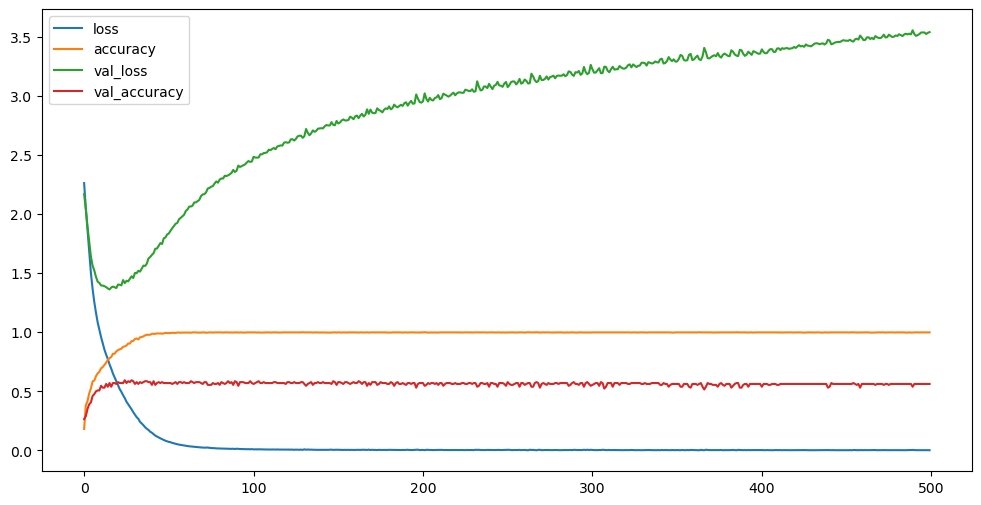

In [50]:
# training the model with adam optimizer
model_mfcc1_history = trainModel(X_train_mfcc, y_train_mfcc, X_validation_mfcc, y_validation_mfcc, model=model_mfcc1, epochs=500, optimizer='adam')

# visualizing training, validation loss & accuracy
plotHistory(model_mfcc1_history)

In [66]:
# Evaluate model 1
test_loss_mfcc1, test_acc_mfcc1  = model_mfcc1.evaluate(X_test_mfcc, y_test_mfcc, batch_size=128)
print("The test Loss is :",test_loss_mfcc1)
print("\nThe test Accuracy is :",test_acc_mfcc1*100)

2/2 [==============================] - 0s 2ms/step - loss: 3.0301 - accuracy: 0.5933
The test Loss is : 3.030055046081543

The test Accuracy is : 59.333330392837524


5/5 [==============================] - 0s 1ms/step


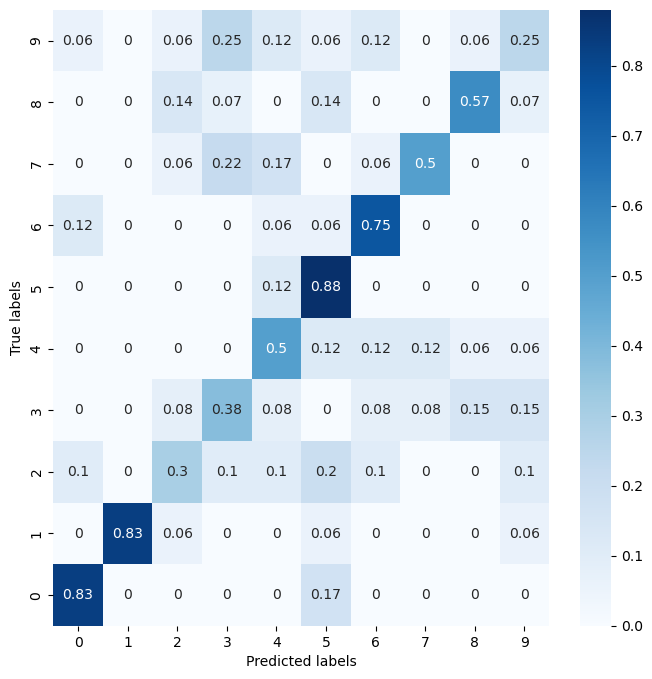

              precision    recall  f1-score   support

           0       0.71      0.83      0.77        12
           1       1.00      0.83      0.91        18
           2       0.33      0.30      0.32        10
           3       0.33      0.38      0.36        13
           4       0.44      0.50      0.47        16
           5       0.58      0.88      0.70        17
           6       0.63      0.75      0.69        16
           7       0.75      0.50      0.60        18
           8       0.67      0.57      0.62        14
           9       0.40      0.25      0.31        16

    accuracy                           0.59       150
   macro avg       0.59      0.58      0.57       150
weighted avg       0.60      0.59      0.59       150



In [126]:
# Confusion matrix for model 1
plot_confusion_matrix(model_mfcc1,X_test_mfcc, y_test_mfcc)

In [52]:
# regular neural network on mfcc dataset with rmsprop as optimizer
model_mfcc2 = keras.models.Sequential([
    keras.layers.Dense(1024, activation='relu', input_shape=(X_train_mfcc.shape[1],)),
    keras.layers.Dropout(0.3),
    
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dropout(0.3),

    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dropout(0.3),

    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.3),

    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dropout(0.3),

    keras.layers.Dense(10, activation='softmax'),
])
print(model_mfcc2.summary())

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 1024)              21504     
                                                                 
 dropout_4 (Dropout)         (None, 1024)              0         
                                                                 
 dense_17 (Dense)            (None, 512)               524800    
                                                                 
 dropout_5 (Dropout)         (None, 512)               0         
                                                                 
 dense_18 (Dense)            (None, 256)               131328    
                                                                 
 dropout_6 (Dropout)         (None, 256)               0         
                                                                 
 dense_19 (Dense)            (None, 128)              

Epoch 1/500
6/6 [==============================] - 1s 27ms/step - loss: 2.2767 - accuracy: 0.1345 - val_loss: 2.0775 - val_accuracy: 0.3750
Epoch 2/500
6/6 [==============================] - 0s 10ms/step - loss: 2.0256 - accuracy: 0.2760 - val_loss: 1.8682 - val_accuracy: 0.3359
Epoch 3/500
6/6 [==============================] - 0s 11ms/step - loss: 1.9037 - accuracy: 0.3204 - val_loss: 1.7172 - val_accuracy: 0.3906
Epoch 4/500
6/6 [==============================] - 0s 10ms/step - loss: 1.8254 - accuracy: 0.3551 - val_loss: 1.6787 - val_accuracy: 0.4062
Epoch 5/500
6/6 [==============================] - 0s 10ms/step - loss: 1.6917 - accuracy: 0.3856 - val_loss: 1.6271 - val_accuracy: 0.3516
Epoch 6/500
6/6 [==============================] - 0s 10ms/step - loss: 1.5995 - accuracy: 0.4244 - val_loss: 1.5518 - val_accuracy: 0.4219
Epoch 7/500
6/6 [==============================] - 0s 10ms/step - loss: 1.5360 - accuracy: 0.4424 - val_loss: 1.5453 - val_accuracy: 0.4219
Epoch 8/500
6/6 [===

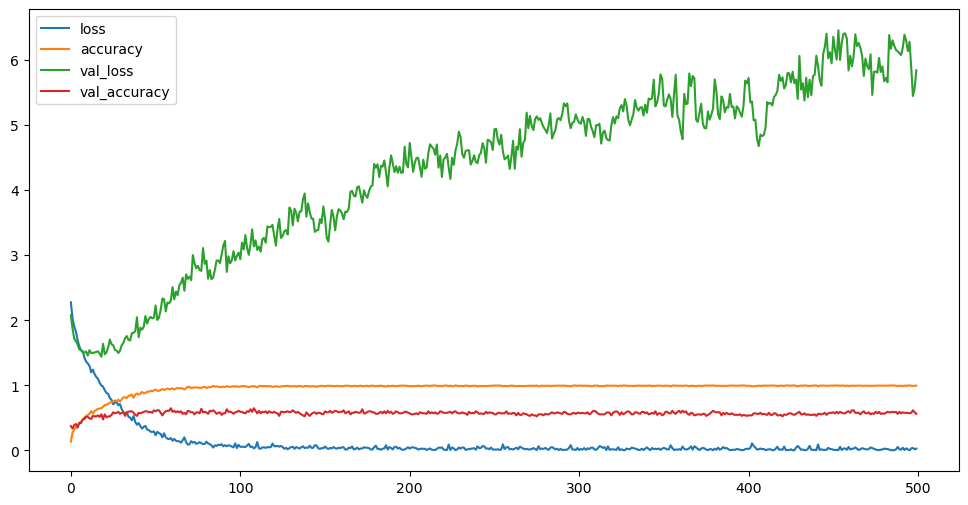

In [53]:
# training the model with adam optimizer
model_mfcc2_history = trainModel(X_train_mfcc, y_train_mfcc, X_validation_mfcc, y_validation_mfcc, model=model_mfcc2, epochs=500, optimizer='rmsprop')

# visualizing training, validation loss & accuracy
plotHistory(model_mfcc2_history)

In [68]:
# Evaluate model 2
test_loss_mfcc2, test_acc_mfcc2  = model_mfcc2.evaluate(X_test_mfcc, y_test_mfcc, batch_size=128)
print("The test Loss is :",test_loss_mfcc2)
print("\nThe test Accuracy is :",test_acc_mfcc2*100)

2/2 [==============================] - 0s 3ms/step - loss: 4.9624 - accuracy: 0.5800
The test Loss is : 4.962427139282227

The test Accuracy is : 57.999998331069946


5/5 [==============================] - 0s 2ms/step


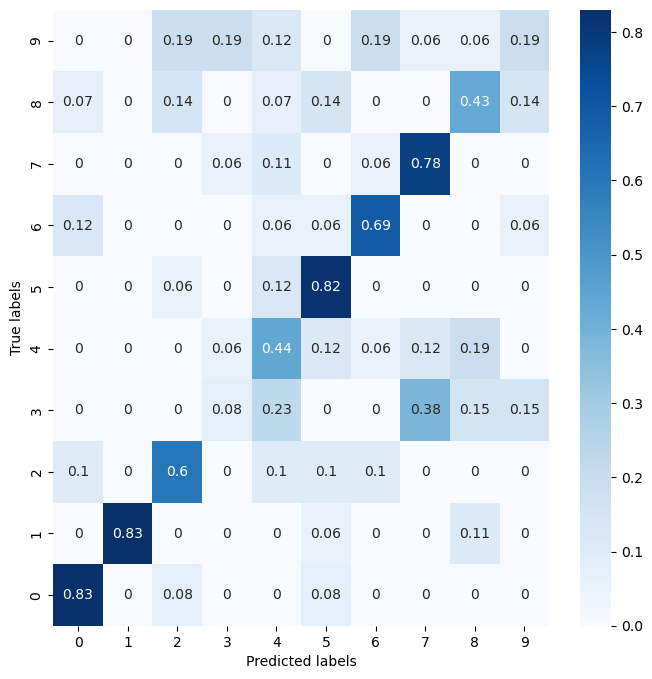

              precision    recall  f1-score   support

           0       0.71      0.83      0.77        12
           1       1.00      0.83      0.91        18
           2       0.46      0.60      0.52        10
           3       0.17      0.08      0.11        13
           4       0.37      0.44      0.40        16
           5       0.64      0.82      0.72        17
           6       0.65      0.69      0.67        16
           7       0.64      0.78      0.70        18
           8       0.43      0.43      0.43        14
           9       0.38      0.19      0.25        16

    accuracy                           0.58       150
   macro avg       0.54      0.57      0.55       150
weighted avg       0.56      0.58      0.56       150



In [127]:
# Confusion Matrix for model2
plot_confusion_matrix(model_mfcc2,X_test_mfcc, y_test_mfcc)

In [55]:
# regular neural network on the augmented mfcc dataset
model_aug_mfcc1 = keras.models.Sequential([
    keras.layers.Dense(256, activation='relu', input_shape=(X_train_aug_mfcc.shape[1],)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(10, activation='softmax'),
])
print(model_aug_mfcc1.summary())

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_22 (Dense)            (None, 256)               5376      
                                                                 
 dense_23 (Dense)            (None, 128)               32896     
                                                                 
 dense_24 (Dense)            (None, 64)                8256      
                                                                 
 dense_25 (Dense)            (None, 10)                650       
                                                                 
Total params: 47,178
Trainable params: 47,178
Non-trainable params: 0
_________________________________________________________________
None


Epoch 1/500
17/17 [==============================] - 0s 8ms/step - loss: 2.1744 - accuracy: 0.2366 - val_loss: 2.0098 - val_accuracy: 0.3316
Epoch 2/500
17/17 [==============================] - 0s 3ms/step - loss: 1.8725 - accuracy: 0.3484 - val_loss: 1.7903 - val_accuracy: 0.3603
Epoch 3/500
17/17 [==============================] - 0s 3ms/step - loss: 1.6446 - accuracy: 0.4436 - val_loss: 1.6117 - val_accuracy: 0.4334
Epoch 4/500
17/17 [==============================] - 0s 3ms/step - loss: 1.4733 - accuracy: 0.5009 - val_loss: 1.5211 - val_accuracy: 0.4543
Epoch 5/500
17/17 [==============================] - 0s 3ms/step - loss: 1.3636 - accuracy: 0.5388 - val_loss: 1.4618 - val_accuracy: 0.4909
Epoch 6/500
17/17 [==============================] - 0s 3ms/step - loss: 1.2750 - accuracy: 0.5790 - val_loss: 1.4112 - val_accuracy: 0.5065
Epoch 7/500
17/17 [==============================] - 0s 3ms/step - loss: 1.2219 - accuracy: 0.5938 - val_loss: 1.3942 - val_accuracy: 0.4935
Epoch 8/500
1

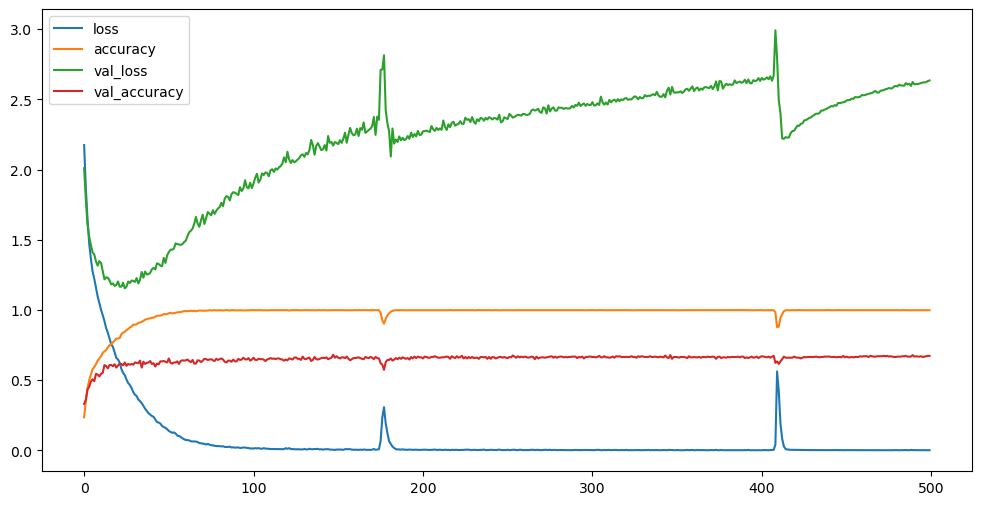

In [56]:
# training the model with augmented mfcc features
model_aug_mfcc1_history = trainModel(X_train_aug_mfcc, y_train_aug_mfcc, X_validation_aug_mfcc, y_validation_aug_mfcc, model=model_aug_mfcc1, epochs=500, optimizer='adam')

# visualizing training, validation loss & accuracy
plotHistory(model_aug_mfcc1_history)

In [70]:
# Evaluate the model
test_loss_aug_mfcc1, test_acc_aug_mfcc1  = model_aug_mfcc1.evaluate(X_test_aug_mfcc, y_test_aug_mfcc, batch_size=128)
print("The test Loss for augmeted mfcc:",test_loss_aug_mfcc1)
print("\nThe test Accuracy for augmented mfcc :",test_acc_aug_mfcc1*100)

4/4 [==============================] - 0s 1ms/step - loss: 2.8745 - accuracy: 0.6978
The test Loss for augmeted mfcc: 2.874534845352173

The test Accuracy for augmented mfcc : 69.77777481079102


15/15 [==============================] - 0s 940us/step


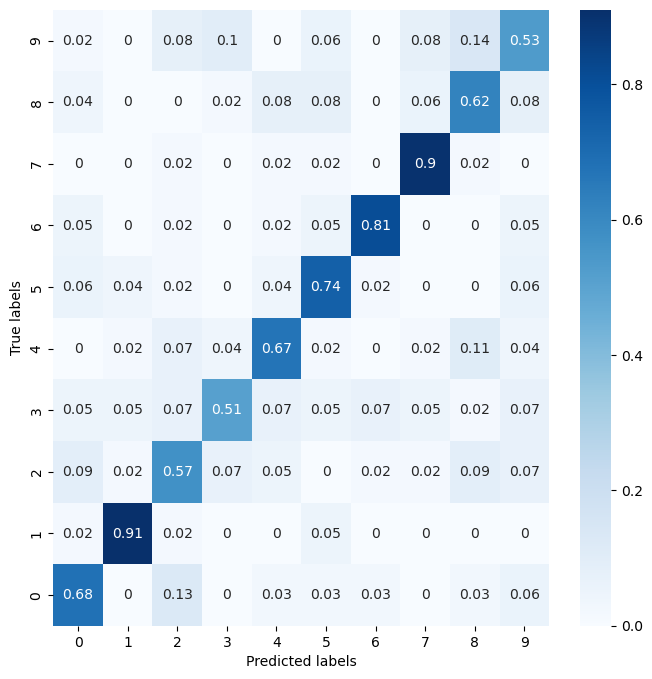

              precision    recall  f1-score   support

           0       0.58      0.68      0.63        31
           1       0.89      0.91      0.90        55
           2       0.58      0.57      0.57        44
           3       0.67      0.51      0.58        43
           4       0.69      0.67      0.68        46
           5       0.67      0.74      0.71        47
           6       0.85      0.81      0.83        43
           7       0.78      0.90      0.84        42
           8       0.61      0.62      0.62        48
           9       0.59      0.53      0.56        51

    accuracy                           0.70       450
   macro avg       0.69      0.70      0.69       450
weighted avg       0.70      0.70      0.69       450



In [128]:
# Confusion Matrix for model 3
plot_confusion_matrix(model_aug_mfcc1,X_test_aug_mfcc, y_test_aug_mfcc)

# Neural Network Implementation using Chroma features

In [58]:
# Model training on chroma dataset
model_chroma1 = keras.models.Sequential([
    keras.layers.Dense(256, activation='relu', input_shape=(X_train_chroma.shape[1],)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(10, activation='softmax'),
])
print(model_chroma1.summary())

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_26 (Dense)            (None, 256)               3328      
                                                                 
 dense_27 (Dense)            (None, 128)               32896     
                                                                 
 dense_28 (Dense)            (None, 64)                8256      
                                                                 
 dense_29 (Dense)            (None, 10)                650       
                                                                 
Total params: 45,130
Trainable params: 45,130
Non-trainable params: 0
_________________________________________________________________
None


Epoch 1/500
12/12 [==============================] - 0s 11ms/step - loss: 2.1609 - accuracy: 0.1989 - val_loss: 2.0154 - val_accuracy: 0.2353
Epoch 2/500
12/12 [==============================] - 0s 4ms/step - loss: 1.9579 - accuracy: 0.2855 - val_loss: 1.8370 - val_accuracy: 0.3020
Epoch 3/500
12/12 [==============================] - 0s 4ms/step - loss: 1.8161 - accuracy: 0.3583 - val_loss: 1.7195 - val_accuracy: 0.3725
Epoch 4/500
12/12 [==============================] - 0s 4ms/step - loss: 1.7217 - accuracy: 0.3853 - val_loss: 1.6482 - val_accuracy: 0.3451
Epoch 5/500
12/12 [==============================] - 0s 3ms/step - loss: 1.6568 - accuracy: 0.3999 - val_loss: 1.6218 - val_accuracy: 0.3412
Epoch 6/500
12/12 [==============================] - 0s 3ms/step - loss: 1.6108 - accuracy: 0.4158 - val_loss: 1.5802 - val_accuracy: 0.3882
Epoch 7/500
12/12 [==============================] - 0s 3ms/step - loss: 1.5716 - accuracy: 0.4428 - val_loss: 1.5672 - val_accuracy: 0.3922
Epoch 8/500


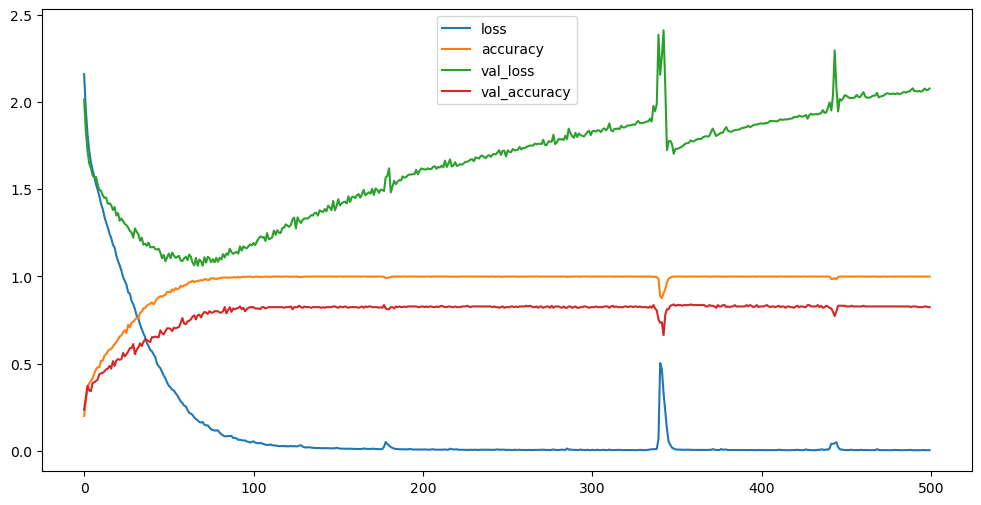

In [59]:
# training the model with chroma features
model_chroma1_history = trainModel(X_train_chroma, y_train_chroma, X_validation_chroma, y_validation_chroma, model=model_chroma1, epochs=500, optimizer='adam')

# Visualization of training vs validation (loss and accuracy)
plotHistory(model_chroma1_history)

In [72]:
# evaluate the testing data
test_loss_chroma1, test_acc_chroma1  = model_chroma1.evaluate(X_test_chroma, y_test_chroma, batch_size=128)
print("The test Loss for chroma raw data: ",test_loss_chroma1)
print("\nThe test Accuracy for chroma raw data: ",test_acc_chroma1*100)

3/3 [==============================] - 0s 1ms/step - loss: 1.6802 - accuracy: 0.8433
The test Loss for chroma raw data:  1.6801708936691284

The test Accuracy for chroma raw data:  84.33333039283752


10/10 [==============================] - 0s 966us/step


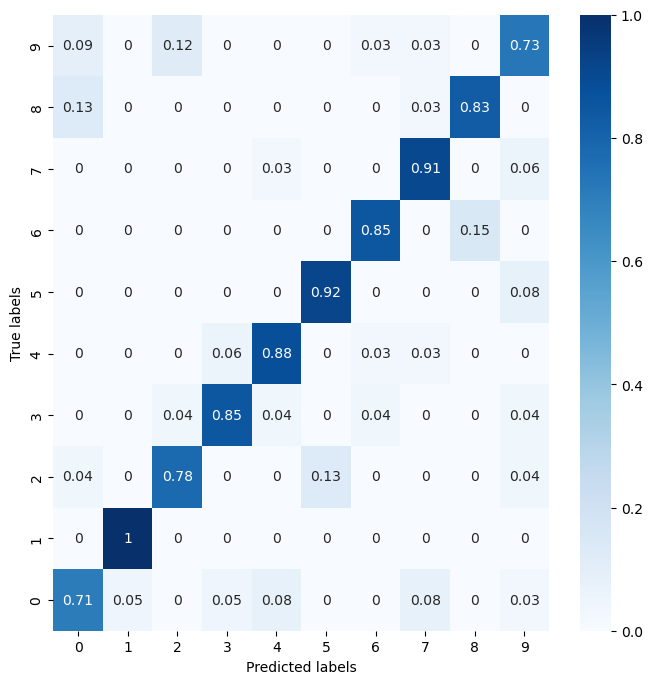

              precision    recall  f1-score   support

           0       0.77      0.71      0.74        38
           1       0.94      1.00      0.97        30
           2       0.78      0.78      0.78        23
           3       0.85      0.85      0.85        27
           4       0.85      0.88      0.87        33
           5       0.89      0.92      0.91        26
           6       0.88      0.85      0.87        27
           7       0.83      0.91      0.87        33
           8       0.86      0.83      0.85        30
           9       0.77      0.73      0.75        33

    accuracy                           0.84       300
   macro avg       0.84      0.85      0.84       300
weighted avg       0.84      0.84      0.84       300



In [129]:
# confusion matrix
plot_confusion_matrix(model_chroma1,X_test_chroma, y_test_chroma)

In [62]:
# Model training on augmented chroma dataset
model_aug_chroma1 = keras.models.Sequential([
    keras.layers.Dense(256, activation='relu', input_shape=(X_train_aug_chroma.shape[1],)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(10, activation='softmax'),
])
print(model_aug_chroma1.summary())

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_30 (Dense)            (None, 256)               3328      
                                                                 
 dense_31 (Dense)            (None, 128)               32896     
                                                                 
 dense_32 (Dense)            (None, 64)                8256      
                                                                 
 dense_33 (Dense)            (None, 10)                650       
                                                                 
Total params: 45,130
Trainable params: 45,130
Non-trainable params: 0
_________________________________________________________________
None


Epoch 1/500
12/12 [==============================] - 0s 11ms/step - loss: 2.2317 - accuracy: 0.1608 - val_loss: 2.1138 - val_accuracy: 0.2314
Epoch 2/500
12/12 [==============================] - 0s 4ms/step - loss: 2.0645 - accuracy: 0.2661 - val_loss: 1.9549 - val_accuracy: 0.2627
Epoch 3/500
12/12 [==============================] - 0s 3ms/step - loss: 1.9461 - accuracy: 0.2973 - val_loss: 1.8837 - val_accuracy: 0.2824
Epoch 4/500
12/12 [==============================] - 0s 4ms/step - loss: 1.8727 - accuracy: 0.3292 - val_loss: 1.8168 - val_accuracy: 0.3020
Epoch 5/500
12/12 [==============================] - 0s 4ms/step - loss: 1.8102 - accuracy: 0.3465 - val_loss: 1.7862 - val_accuracy: 0.3373
Epoch 6/500
12/12 [==============================] - 0s 4ms/step - loss: 1.7552 - accuracy: 0.3832 - val_loss: 1.7531 - val_accuracy: 0.3412
Epoch 7/500
12/12 [==============================] - 0s 3ms/step - loss: 1.7164 - accuracy: 0.4033 - val_loss: 1.7243 - val_accuracy: 0.3451
Epoch 8/500


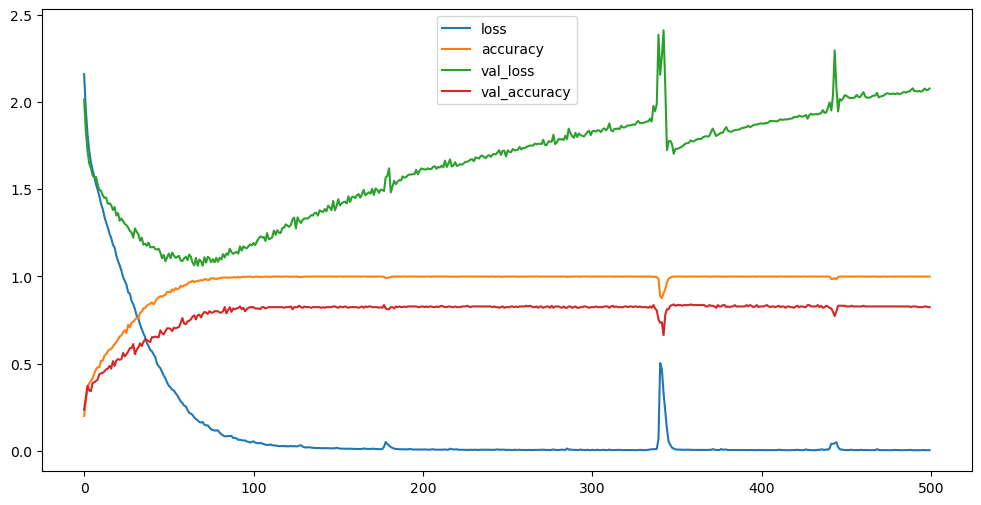

In [63]:
# training the model with augmented chroma features
model_aug_chroma1_history = trainModel(X_train_aug_chroma, y_train_aug_chroma, X_validation_aug_chroma, y_validation_aug_chroma, model=model_aug_chroma1, epochs=500, optimizer='adam')
# Visualization of training vs validation (loss and accuracy)
plotHistory(model_chroma1_history)

In [74]:
# evaluate the testing data
test_loss_aug_chroma1, test_acc_aug_chroma1  = model_aug_chroma1.evaluate(X_test_aug_chroma, y_test_aug_chroma, batch_size=128)
print("The test Loss for chroma augmented dataset: ",test_loss_aug_chroma1)
print("\nThe test Accuracy for chroma augmented dataset: ",test_acc_aug_chroma1*100)

3/3 [==============================] - 0s 1ms/step - loss: 3.2992 - accuracy: 0.6500
The test Loss for chroma augmented dataset:  3.299208879470825

The test Accuracy for chroma augmented dataset:  64.99999761581421


10/10 [==============================] - 0s 955us/step


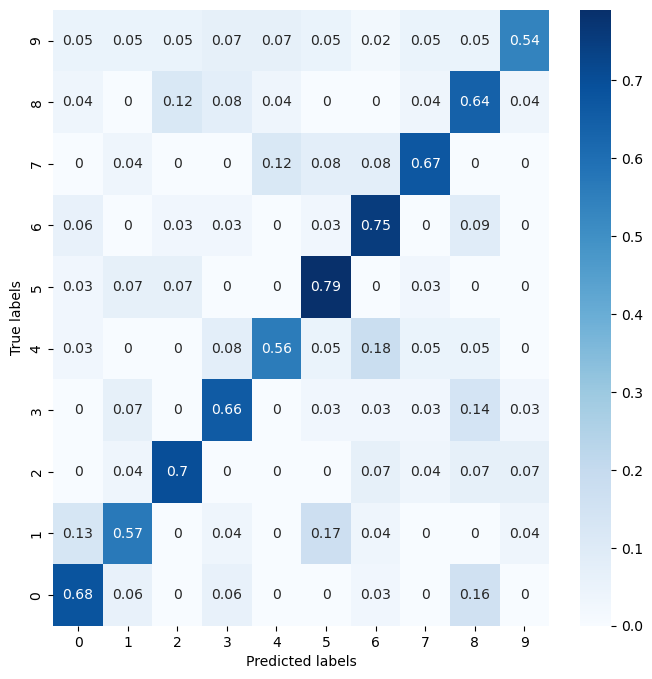

              precision    recall  f1-score   support

           0       0.68      0.68      0.68        31
           1       0.57      0.57      0.57        23
           2       0.70      0.70      0.70        27
           3       0.61      0.66      0.63        29
           4       0.76      0.56      0.65        39
           5       0.66      0.79      0.72        29
           6       0.62      0.75      0.68        32
           7       0.67      0.67      0.67        24
           8       0.47      0.64      0.54        25
           9       0.81      0.54      0.65        41

    accuracy                           0.65       300
   macro avg       0.65      0.66      0.65       300
weighted avg       0.67      0.65      0.65       300



In [130]:
# confusion matrix
plot_confusion_matrix(model_aug_chroma1,X_test_aug_chroma, y_test_aug_chroma)

# RNN (LSTM) Model



Chroma Data

In [76]:
# change train, test, and validation chroma data in 2D
X_train_2d = X_train_chroma.reshape(X_train_chroma.shape[0],-1)
X_test_2d = X_test_chroma.reshape(X_test_chroma.shape[0],-1)
X_validation_2d = X_validation_chroma.reshape(X_validation_chroma.shape[0],-1)
X_train_2d.shape

(1443, 12)

In [77]:
# change train, test, and validation chroma data with augmentation in 2D
X_aug_train_2d = X_train_aug_chroma.reshape(X_train_aug_chroma.shape[0],-1)
X_aug_test_2d = X_test_aug_chroma.reshape(X_test_aug_chroma.shape[0],-1)
X_aug_validation_2d = X_validation_aug_chroma.reshape(X_validation_aug_chroma.shape[0],-1)
X_aug_train_2d.shape

(1443, 12)

In [78]:
# change y chroma data to 10 labels
y_train_onehot = tf.one_hot(y_train_chroma,10)
y_test_onehot= tf.one_hot(y_test_chroma,10)
y_validation_onehot = tf.one_hot(y_validation_chroma,10)

In [135]:
# change y augmented chroma data to 10 labels
y_train_aug_onehot = tf.one_hot(y_train_aug_chroma,10)
y_test_aug_onehot= tf.one_hot(y_test_aug_chroma,10)
y_validation_aug_onehot = tf.one_hot(y_validation_aug_chroma,10)

mfcc Data

In [168]:
# transform x mfcc data to 2d to fit the model
X_train_mfcc_2d = X_train_mfcc.reshape(X_train_mfcc.shape[0],-1)
X_test_mfcc_2d = X_test_mfcc.reshape(X_test_mfcc.shape[0],-1)
X_validation_mfcc_2d = X_validation_mfcc.reshape(X_validation_mfcc.shape[0],-1)
X_train_mfcc_2d.shape

(721, 20)

In [169]:
# transform x mfcc data with augmentation to 2d to fit the model
X_train_aug_mfcc_2d = X_train_aug_mfcc.reshape(X_train_aug_mfcc.shape[0],-1)
X_test_aug_mfcc_2d = X_test_aug_mfcc.reshape(X_test_aug_mfcc.shape[0],-1)
X_validation_aug_mfcc_2d = X_validation_aug_mfcc.reshape(X_validation_aug_mfcc.shape[0],-1)
X_train_aug_mfcc_2d.shape

(2164, 20)

In [170]:
# one hot encoding y mfcc data
y_train_mfcc_onehot = tf.one_hot(y_train_mfcc,20)
y_test_mfcc_onehot= tf.one_hot(y_test_mfcc,20)
y_validation_mfcc_onehot = tf.one_hot(y_validation_mfcc,20)

In [171]:
# one hot encoding y mfcc augmented data
y_train_aug_mfcc_onehot = tf.one_hot(y_train_aug_mfcc,20)
y_test_aug_mfcc_onehot = tf.one_hot(y_test_aug_mfcc,20)
y_validation_aug_mfcc_onehot = tf.one_hot(y_validation_aug_mfcc,20)

LSTM Model and Evaluations

In [141]:
# plot the training processing
def plot_rnn_History(history):
    print("Max. Validation Accuracy",max(history.history["val_acc"]))
    pd.DataFrame(history.history).plot(figsize=(12,6))
    plt.show()

In [147]:
# rnn model evaluation method
def rnn_evaluation(model,history,x_test,y_test):    
    plot_rnn_History(history)
    test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)
    print("\nThe test Loss is :",test_loss)
    print("The test Accuracy is :",test_acc)    

In [102]:
# RNN Model
def rnn_model (input_shape,output_shape):
    model_RNN = keras.Sequential()
    # # Long Short-term Memory Recurrent Neural Network based Segment Features for Music Genre Classification
    model_RNN.add(LSTM(units=128, dropout=0.05, recurrent_dropout=0.35, return_sequences=True, input_shape=input_shape))
    model_RNN.add(LSTM(units=32,  dropout=0.05, recurrent_dropout=0.35, return_sequences=False))
    model_RNN.add(Dense(32, activation='relu'))
    model_RNN.add(BatchNormalization())
    model_RNN.add(Dropout(0.2))

    model_RNN.add(Dense(16, activation='relu'))
    model_RNN.add(Dropout(0.2)) 
    model_RNN.add(Dense(16, activation='relu'))

    # output layer
    model_RNN.add(Dense(output_shape,activation='softmax'))

    # compile the model
    model_RNN.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['acc'])
    model_RNN.summary()

    return model_RNN

In [196]:
# create rnn model for chroma features
rnn_model_chroma = rnn_model((X_train_chroma.shape[1],1),X_train_chroma.shape[1])

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_16 (LSTM)              (None, 12, 128)           66560     
                                                                 
 lstm_17 (LSTM)              (None, 32)                20608     
                                                                 
 dense_62 (Dense)            (None, 32)                1056      
                                                                 
 batch_normalization_12 (Bat  (None, 32)               128       
 chNormalization)                                                
                                                                 
 dropout_21 (Dropout)        (None, 32)                0         
                                                                 
 dense_63 (Dense)            (None, 16)                528       
                                                     

In [204]:
# create rnn model for mfcc features
rnn_model_mfcc = rnn_model((X_train_mfcc.shape[1],1),X_train_mfcc.shape[1])

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_18 (LSTM)              (None, 20, 128)           66560     
                                                                 
 lstm_19 (LSTM)              (None, 32)                20608     
                                                                 
 dense_66 (Dense)            (None, 32)                1056      
                                                                 
 batch_normalization_13 (Bat  (None, 32)               128       
 chNormalization)                                                
                                                                 
 dropout_23 (Dropout)        (None, 32)                0         
                                                                 
 dense_67 (Dense)            (None, 16)                528       
                                                     

Evaluate the LSTM model with mfcc data

In [105]:
# fit the model with mfcc data before data augmentation
rnn_history_mfcc = rnn_model_mfcc.fit(X_train_mfcc, y_train_mfcc_onehot, epochs=500, batch_size=16, validation_data=(X_validation_mfcc, y_validation_mfcc_onehot), shuffle=False)

Epoch 1/500
46/46 [==============================] - 4s 31ms/step - loss: 2.9127 - acc: 0.0888 - val_loss: 2.9176 - val_acc: 0.1094
Epoch 2/500
46/46 [==============================] - 1s 24ms/step - loss: 2.6693 - acc: 0.1234 - val_loss: 2.8000 - val_acc: 0.1016
Epoch 3/500
46/46 [==============================] - 1s 23ms/step - loss: 2.4852 - acc: 0.1650 - val_loss: 2.5946 - val_acc: 0.1875
Epoch 4/500
46/46 [==============================] - 1s 24ms/step - loss: 2.3489 - acc: 0.1928 - val_loss: 2.4240 - val_acc: 0.1875
Epoch 5/500
46/46 [==============================] - 1s 24ms/step - loss: 2.2601 - acc: 0.2108 - val_loss: 2.3024 - val_acc: 0.2344
Epoch 6/500
46/46 [==============================] - 1s 24ms/step - loss: 2.1468 - acc: 0.2469 - val_loss: 2.1916 - val_acc: 0.2266
Epoch 7/500
46/46 [==============================] - 1s 24ms/step - loss: 2.1529 - acc: 0.2247 - val_loss: 2.1320 - val_acc: 0.2578
Epoch 8/500
46/46 [==============================] - 1s 24ms/step - loss: 2.

Max. Validation Accuracy 0.5234375


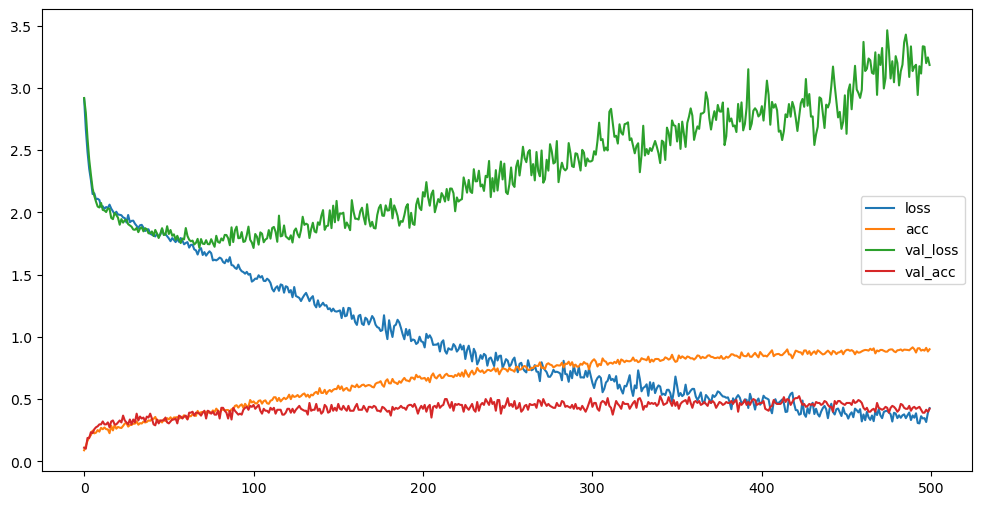

5/5 - 0s - loss: 3.2916 - acc: 0.4067 - 36ms/epoch - 7ms/step

The test Loss is : 3.2916014194488525
The test Accuracy is : 0.40666666626930237


In [148]:
# evaluate the model
rnn_evaluation(rnn_model_mfcc, rnn_history_mfcc, X_test_mfcc,  y_test_mfcc_onehot)

5/5 [==============================] - 0s 5ms/step


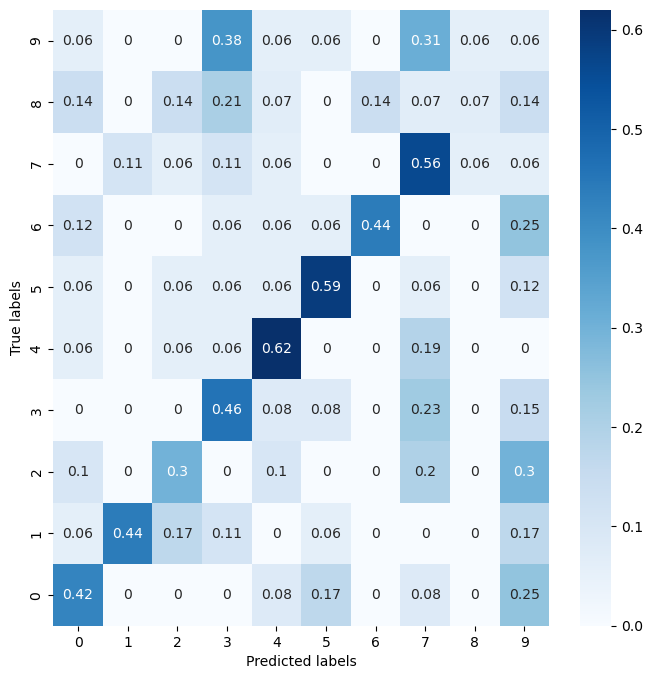

              precision    recall  f1-score   support

           0       0.36      0.42      0.38        12
           1       0.80      0.44      0.57        18
           2       0.27      0.30      0.29        10
           3       0.27      0.46      0.34        13
           4       0.56      0.62      0.59        16
           5       0.62      0.59      0.61        17
           6       0.78      0.44      0.56        16
           7       0.38      0.56      0.45        18
           8       0.33      0.07      0.12        14
           9       0.05      0.06      0.05        16

    accuracy                           0.41       150
   macro avg       0.44      0.40      0.40       150
weighted avg       0.46      0.41      0.41       150



In [131]:
# confusion matrix
plot_confusion_matrix(rnn_model_mfcc,X_test_mfcc, y_test_mfcc)

In [206]:
# fit the model with mfcc data after data augmentation
rnn_history_aug_mfcc = rnn_model_mfcc.fit(X_train_aug_mfcc, y_train_aug_mfcc_onehot, epochs=500, batch_size=16, validation_data=(X_validation_aug_mfcc, y_validation_aug_mfcc_onehot), shuffle=False)

Epoch 1/500
136/136 [==============================] - 3s 23ms/step - loss: 2.4836 - acc: 0.1502 - val_loss: 2.4392 - val_acc: 0.1719
Epoch 2/500
136/136 [==============================] - 3s 24ms/step - loss: 2.2469 - acc: 0.1867 - val_loss: 2.2132 - val_acc: 0.1719
Epoch 3/500
136/136 [==============================] - 4s 26ms/step - loss: 2.1753 - acc: 0.1950 - val_loss: 2.1497 - val_acc: 0.2344
Epoch 4/500
136/136 [==============================] - 4s 27ms/step - loss: 2.1796 - acc: 0.1936 - val_loss: 2.1709 - val_acc: 0.1719
Epoch 5/500
136/136 [==============================] - 4s 26ms/step - loss: 2.1249 - acc: 0.2066 - val_loss: 2.1072 - val_acc: 0.2266
Epoch 6/500
136/136 [==============================] - 3s 23ms/step - loss: 2.0778 - acc: 0.2213 - val_loss: 2.0975 - val_acc: 0.2109
Epoch 7/500
136/136 [==============================] - 4s 29ms/step - loss: 2.0875 - acc: 0.2213 - val_loss: 2.0577 - val_acc: 0.2656
Epoch 8/500
136/136 [==============================] - 3s 24ms

Max. Validation Accuracy 0.421875


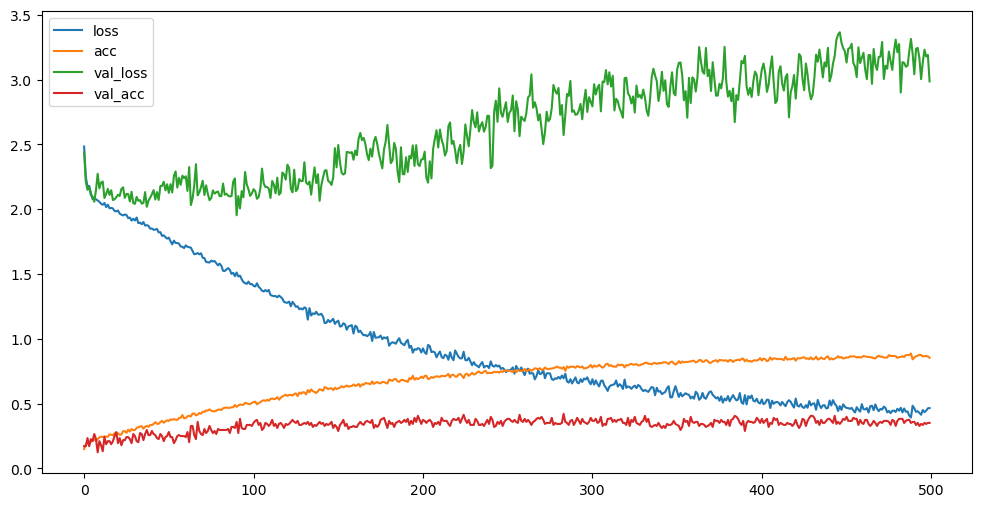

15/15 - 1s - loss: 2.0403 - acc: 0.5733 - 507ms/epoch - 34ms/step

The test Loss is : 2.0403037071228027
The test Accuracy is : 0.5733333230018616


In [208]:
rnn_evaluation(rnn_model_mfcc,rnn_history_aug_mfcc,X_test_aug_mfcc, y_test_aug_mfcc_onehot)

15/15 [==============================] - 1s 6ms/step


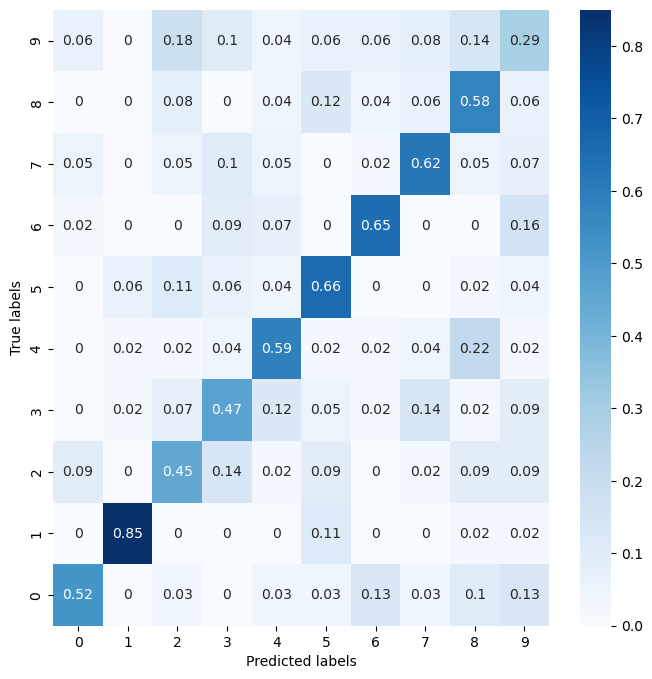

              precision    recall  f1-score   support

           0       0.62      0.52      0.56        31
           1       0.90      0.85      0.88        55
           2       0.44      0.45      0.45        44
           3       0.45      0.47      0.46        43
           4       0.60      0.59      0.59        46
           5       0.57      0.66      0.61        47
           6       0.70      0.65      0.67        43
           7       0.60      0.62      0.61        42
           8       0.49      0.58      0.53        48
           9       0.34      0.29      0.32        51

    accuracy                           0.57       450
   macro avg       0.57      0.57      0.57       450
weighted avg       0.58      0.57      0.57       450



In [209]:
# confusion matrix
plot_confusion_matrix(rnn_model_mfcc,X_test_aug_mfcc, y_test_aug_mfcc)

Evaluate the LSTM model with chroma data

In [113]:
# fit the model with chroma data before data augmentation
rnn_history = rnn_model_chroma.fit(X_train_2d, y_train_onehot, epochs=500, batch_size=16, validation_data=(X_validation_2d, y_validation_onehot), shuffle=False)

Epoch 1/500
91/91 [==============================] - 1s 16ms/step - loss: 1.9765 - acc: 0.2550 - val_loss: 1.8831 - val_acc: 0.3137
Epoch 2/500
91/91 [==============================] - 1s 16ms/step - loss: 1.9364 - acc: 0.2578 - val_loss: 1.8291 - val_acc: 0.3216
Epoch 3/500
91/91 [==============================] - 1s 16ms/step - loss: 1.9418 - acc: 0.2571 - val_loss: 1.7900 - val_acc: 0.2941
Epoch 4/500
91/91 [==============================] - 1s 16ms/step - loss: 1.9343 - acc: 0.2689 - val_loss: 1.7391 - val_acc: 0.3294
Epoch 5/500
91/91 [==============================] - 1s 15ms/step - loss: 1.9079 - acc: 0.2890 - val_loss: 1.7205 - val_acc: 0.3333
Epoch 6/500
91/91 [==============================] - 1s 15ms/step - loss: 1.9056 - acc: 0.2620 - val_loss: 1.7570 - val_acc: 0.2588
Epoch 7/500
91/91 [==============================] - 1s 15ms/step - loss: 1.9109 - acc: 0.2737 - val_loss: 1.7204 - val_acc: 0.3412
Epoch 8/500
91/91 [==============================] - 2s 17ms/step - loss: 1.

Max. Validation Accuracy 0.7960784435272217


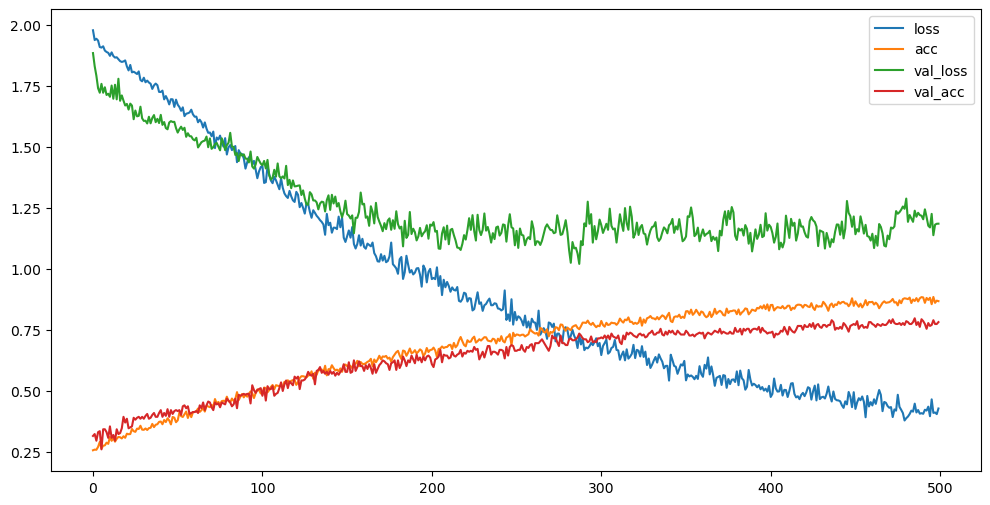

10/10 - 0s - loss: 1.8671 - acc: 0.6067 - 46ms/epoch - 5ms/step

The test Loss is : 1.8670990467071533
The test Accuracy is : 0.6066666841506958


In [187]:
# evaluate the model
rnn_evaluation(rnn_model_chroma,rnn_history,X_test_chroma,y_test_onehot)

10/10 [==============================] - 0s 3ms/step


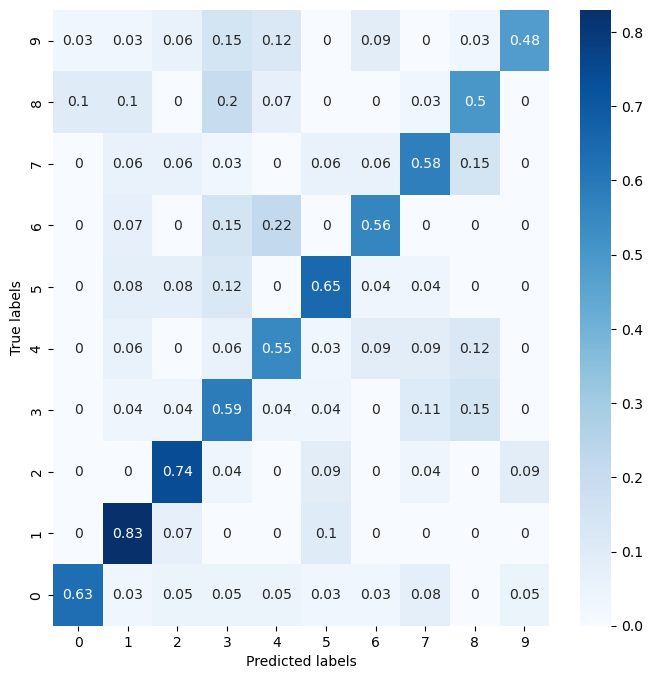

              precision    recall  f1-score   support

           0       0.86      0.63      0.73        38
           1       0.64      0.83      0.72        30
           2       0.61      0.74      0.67        23
           3       0.40      0.59      0.48        27
           4       0.55      0.55      0.55        33
           5       0.63      0.65      0.64        26
           6       0.60      0.56      0.58        27
           7       0.61      0.58      0.59        33
           8       0.52      0.50      0.51        30
           9       0.80      0.48      0.60        33

    accuracy                           0.61       300
   macro avg       0.62      0.61      0.61       300
weighted avg       0.63      0.61      0.61       300



In [188]:
# confusion matrix
plot_confusion_matrix(rnn_model_chroma,X_test_chroma,y_test_chroma)

In [136]:
# fit the model with chroma data after augmentation
rnn_history_aug = rnn_model_chroma.fit(X_aug_train_2d, y_train_aug_onehot, epochs=500, batch_size=16, validation_data=(X_aug_validation_2d, y_validation_aug_onehot), shuffle=False)

Epoch 1/500
91/91 [==============================] - 1s 16ms/step - loss: 2.6471 - acc: 0.3881 - val_loss: 1.7308 - val_acc: 0.4667
Epoch 2/500
91/91 [==============================] - 1s 15ms/step - loss: 1.9708 - acc: 0.3999 - val_loss: 1.6470 - val_acc: 0.4745
Epoch 3/500
91/91 [==============================] - 1s 15ms/step - loss: 1.8198 - acc: 0.4207 - val_loss: 1.6054 - val_acc: 0.4863
Epoch 4/500
91/91 [==============================] - 1s 16ms/step - loss: 1.7182 - acc: 0.4407 - val_loss: 1.5791 - val_acc: 0.4627
Epoch 5/500
91/91 [==============================] - 1s 16ms/step - loss: 1.6878 - acc: 0.4407 - val_loss: 1.5327 - val_acc: 0.5020
Epoch 6/500
91/91 [==============================] - 1s 15ms/step - loss: 1.7063 - acc: 0.4435 - val_loss: 1.5271 - val_acc: 0.4824
Epoch 7/500
91/91 [==============================] - 1s 15ms/step - loss: 1.6513 - acc: 0.4525 - val_loss: 1.4891 - val_acc: 0.4941
Epoch 8/500
91/91 [==============================] - 1s 16ms/step - loss: 1.

Max. Validation Accuracy 0.6627451181411743


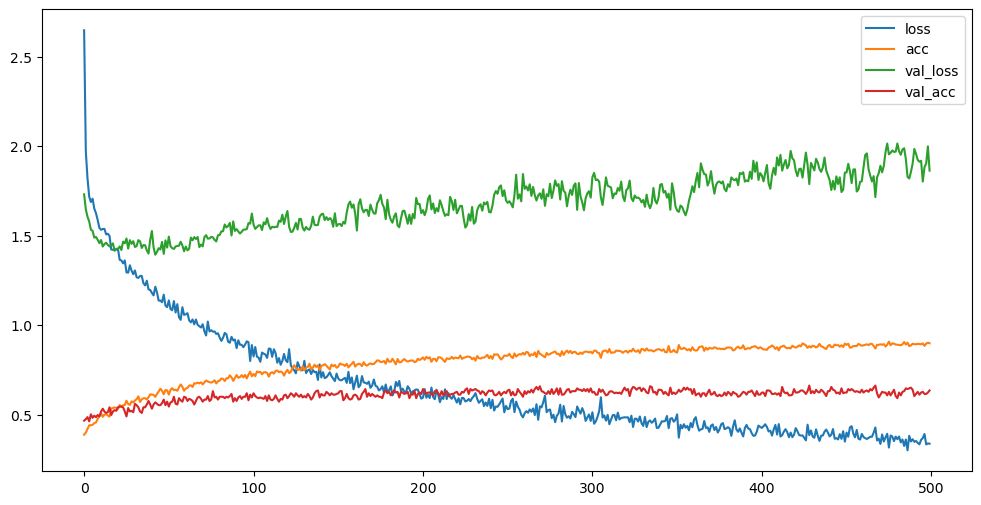

10/10 - 0s - loss: 1.9421 - acc: 0.6500 - 48ms/epoch - 5ms/step

The test Loss is : 1.9420613050460815
The test Accuracy is : 0.6499999761581421


In [185]:
# evaluate the model
rnn_evaluation(rnn_model_chroma,rnn_history_aug,X_test_aug_chroma,y_test_aug_onehot)

10/10 [==============================] - 0s 3ms/step


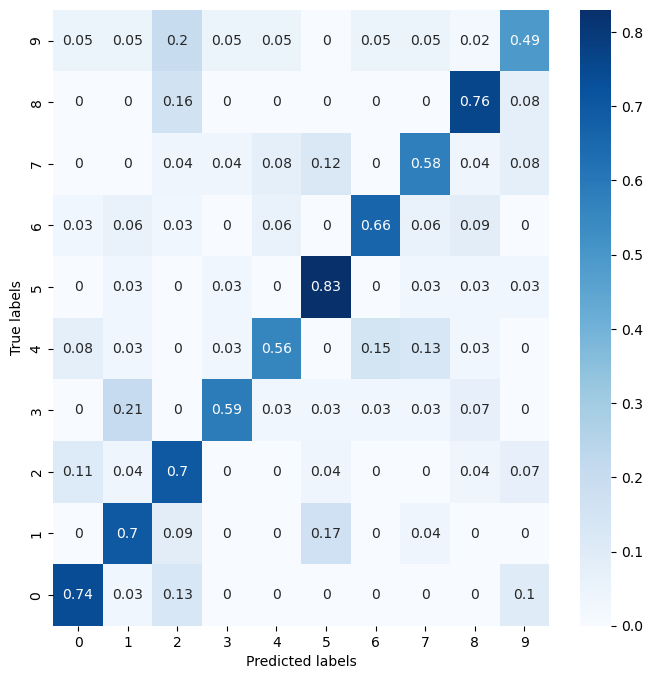

              precision    recall  f1-score   support

           0       0.72      0.74      0.73        31
           1       0.53      0.70      0.60        23
           2       0.49      0.70      0.58        27
           3       0.77      0.59      0.67        29
           4       0.76      0.56      0.65        39
           5       0.73      0.83      0.77        29
           6       0.70      0.66      0.68        32
           7       0.54      0.58      0.56        24
           8       0.66      0.76      0.70        25
           9       0.67      0.49      0.56        41

    accuracy                           0.65       300
   macro avg       0.66      0.66      0.65       300
weighted avg       0.67      0.65      0.65       300



In [184]:
# confusion matrix
plot_confusion_matrix(rnn_model_chroma,X_test_aug_chroma,y_test_aug_chroma)